In [1]:
#importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime

# 1) Loading and Viewing the Dataset

In [2]:
#We load the dataset and look at the overall statistics such as mean, count, and median.

music = pd.read_csv("music_genre.csv")
music


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [3]:
music.info()
music.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


# 2) Data Cleaning

### 2a) Check for any Null Values and remove.

Since we know there are 5 rows. 

In the following code, we will identify the which rows consists Null value and remove specifically.

In [4]:
music[music.isnull().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After identify its row 10000-10004, lets remove them accordingly.

In [5]:
music.drop([10000, 10001, 10002, 10003, 10004], inplace = True)

Next, we would like to check for any duplication rows in our dataset.

In [6]:
music[music.duplicated()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre


There isn't, we will move on.

In the dataset, we have also spotted some rows under column "Duration_ms" containing values of -1.

This is an invalid value, a song duration will never be -1, which may produce errors in our findings, hence we removed them.

In [7]:
music.drop(music[music['duration_ms'] == -1.0].index, inplace = True)
music

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.216,-10.517,Minor,0.0412,?,4-Apr,0.614,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,28408.0,Night Lovell,Barbie Doll,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.988,4-Apr,0.629,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


Besides duration_ms, "tempo" also contains invalid values of "?", These values need to either be removed or replaced with median or mean value. If not errors may occur during our findings. 

In [8]:
music[music["tempo"] == "?"]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.6140,Electronic
32,25836.0,PEEKABOO,Arrival,45.0,0.02330,0.729,274286.0,0.869,0.585000,F,0.0944,-7.569,Minor,0.1290,?,4-Apr,0.1380,Electronic
36,55617.0,Wax Tailor,The Games You Play,45.0,0.04780,0.646,253333.0,0.649,0.002520,G,0.3530,-5.259,Major,0.1170,?,4-Apr,0.7270,Electronic
39,69685.0,Dahu,Vessel,37.0,0.20300,0.769,429941.0,0.551,0.882000,A#,0.1090,-12.520,Minor,0.0408,?,4-Apr,0.0618,Electronic
41,83854.0,UNKLE,Lonely Soul,51.0,0.07760,0.475,533013.0,0.591,0.054900,A,0.1090,-7.854,Minor,0.0374,?,4-Apr,0.1230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49918,63058.0,Big Sean,Bigger Than Me,58.0,0.29600,0.379,292520.0,0.644,0.000000,A#,0.3130,-7.933,Minor,0.1120,?,5-Apr,0.1440,Hip-Hop
49964,53387.0,Millonario,Rayas de Patrón,59.0,0.08470,0.929,215200.0,0.737,0.000000,G#,0.8610,-6.424,Major,0.1020,?,4-Apr,0.8860,Hip-Hop
49967,76585.0,MadeinTYO,I Want (feat. 2 Chainz),62.0,0.17900,0.860,233293.0,0.625,0.000136,D,0.3000,-6.922,Major,0.1050,?,4-Apr,0.2210,Hip-Hop
49976,79654.0,Big Sean,Sunday Morning Jetpack,52.0,0.70000,0.462,225067.0,0.741,0.000000,A#,0.3400,-8.008,Minor,0.1620,?,4-Apr,0.5890,Hip-Hop


There exists 4501 rows with tempo value "?", this problem is significant and has to be resolved.

In [9]:
music.drop(music[music['tempo'] == "?"].index, inplace = True)
music["tempo"] = music["tempo"].astype("float")

music

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,149.995,4-Apr,0.230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,28408.0,Night Lovell,Barbie Doll,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.988,4-Apr,0.629,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.043,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.886,4-Apr,0.354,Hip-Hop


The reason why we are removing invalid values instead of replacing it with median or mean values is because it simplifies the data and makes it easier to work with.

Bias may happen if the mean or median value is inappropriate or if the distribution of the data is skewed.

In [10]:
#Doing a final check on the dataset
pd.isnull(music).sum() #Check for any remaining Null Values 

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

In [11]:
music[music["tempo"] == "?"]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre


In [12]:
music[music["duration_ms"] == -1.0]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre


## Remove unwanted columns

In the dataset, there exist some unwanted column such as "obtained_date", "instance_id", "track_name" and "artist_name". These columns do not have any relation with the song genre.

Date, id and track_name doesn't help in determining a song's genre and wouldn't be able to help us with the prediction for song genre. 

Same artists may produce a different types of genre so we cannot interpret anything based on the artist name. Hence we are removing these columns.

In [13]:
music = music.drop(["instance_id", "track_name", "obtained_date", "artist_name"], axis = 1)
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
6,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,149.995,0.230,Electronic


Resetting for a newer index. After removing many rows.

In [14]:
music.reset_index(inplace = True)

After non-predictive features are removed, here is the updated dataset after this initial clean-up.

In [15]:
music

,index,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,1,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
1,2,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
2,3,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
3,4,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
4,6,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,149.995,0.230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,49999,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.988,0.629,Hip-Hop
40556,50001,72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.043,0.113,Hip-Hop
40557,50002,51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
40558,50003,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.886,0.354,Hip-Hop


# 3) Exploratory Analysis

A brief check shows that most of the features hold numerical values except three columns which has categorical data. 

In [16]:
music.head()

,index,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,1,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
1,2,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
2,3,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
3,4,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
4,6,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,149.995,0.230,Electronic


## 3a) Visualizing Data

In this segment, we will look at the distribution of each audio variable. 
E.g, spread of the data in terms of valence, danceability etc. To better understand how the tracks are distributed, we are using histograms and bar plot. Checking the behaviour of the songs corresponding to an audio feature.

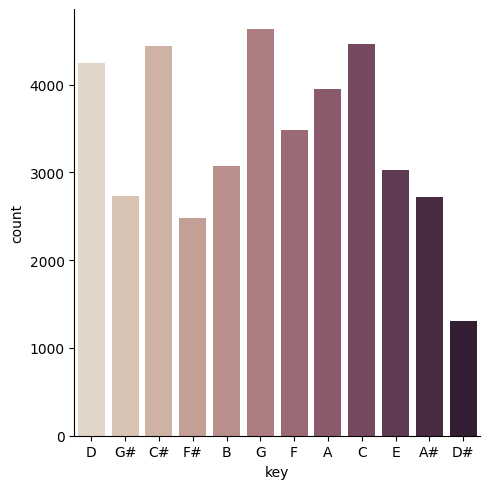

In [17]:
sns.catplot(data=music, x= "key", kind="count", palette="ch:.25")

The plot shows how many times each key is present in the dataset. From the plot, It shows that the tracks are quite spread with Key G being the most popular and Key D# least popular. Every songs have distinct keys.

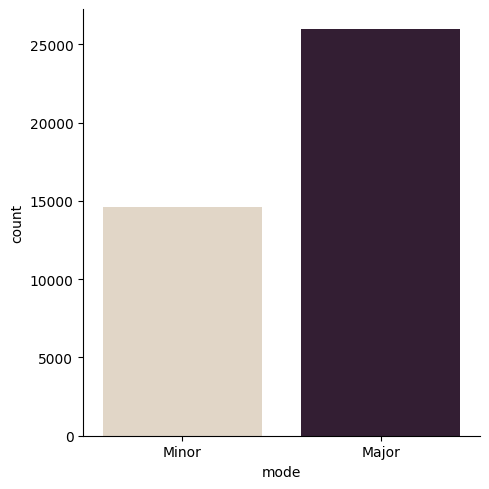

In [18]:
sns.catplot(data=music, x= "mode", kind="count", palette="ch:.25")

The plot shows the distribution of modes for the dataset. From the plot, there are more songs with major mode than minor. However, nothing much can be derived from this.

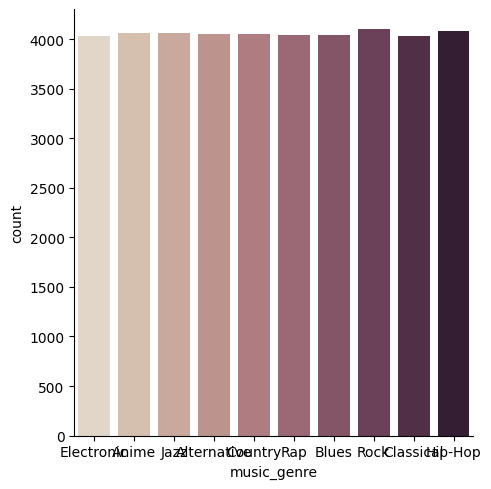

In [19]:
sns.catplot(data=music, x= "music_genre", kind="count", palette="ch:.25",)

The plot shows the number of songs for each genre. From the plot, Music_genre classes are evenly spreaded with 4000 songs in each class. A balanced dataset makes training a model easier because it helps prevent the model from becoming biased towards one class. Now we will move on to view the distributions of numeric variables. 

## 3b) Continous variables

In this segment, we will be using density plot to view the distribution of each numeric variables. We will remove the categorical variables from the dataframe since they are not related. 

In [20]:
numeric_features = music.drop(["key", "music_genre", "mode"], axis = 1)

### Kernel Density Estimate (KDE) plot

Following code plots a 3x4 density plot, displaying each numeric variable's distribution.

KDEPlot (Kernel Density Estimate Plot) is a data visualization technique used to estimate the probability density function of a continuous random variable. It is often used in statistical analysis to visualize the distribution of a dataset.

It is a useful tool for understanding the distribution of a dataset and identifying patterns and relationships in the data.


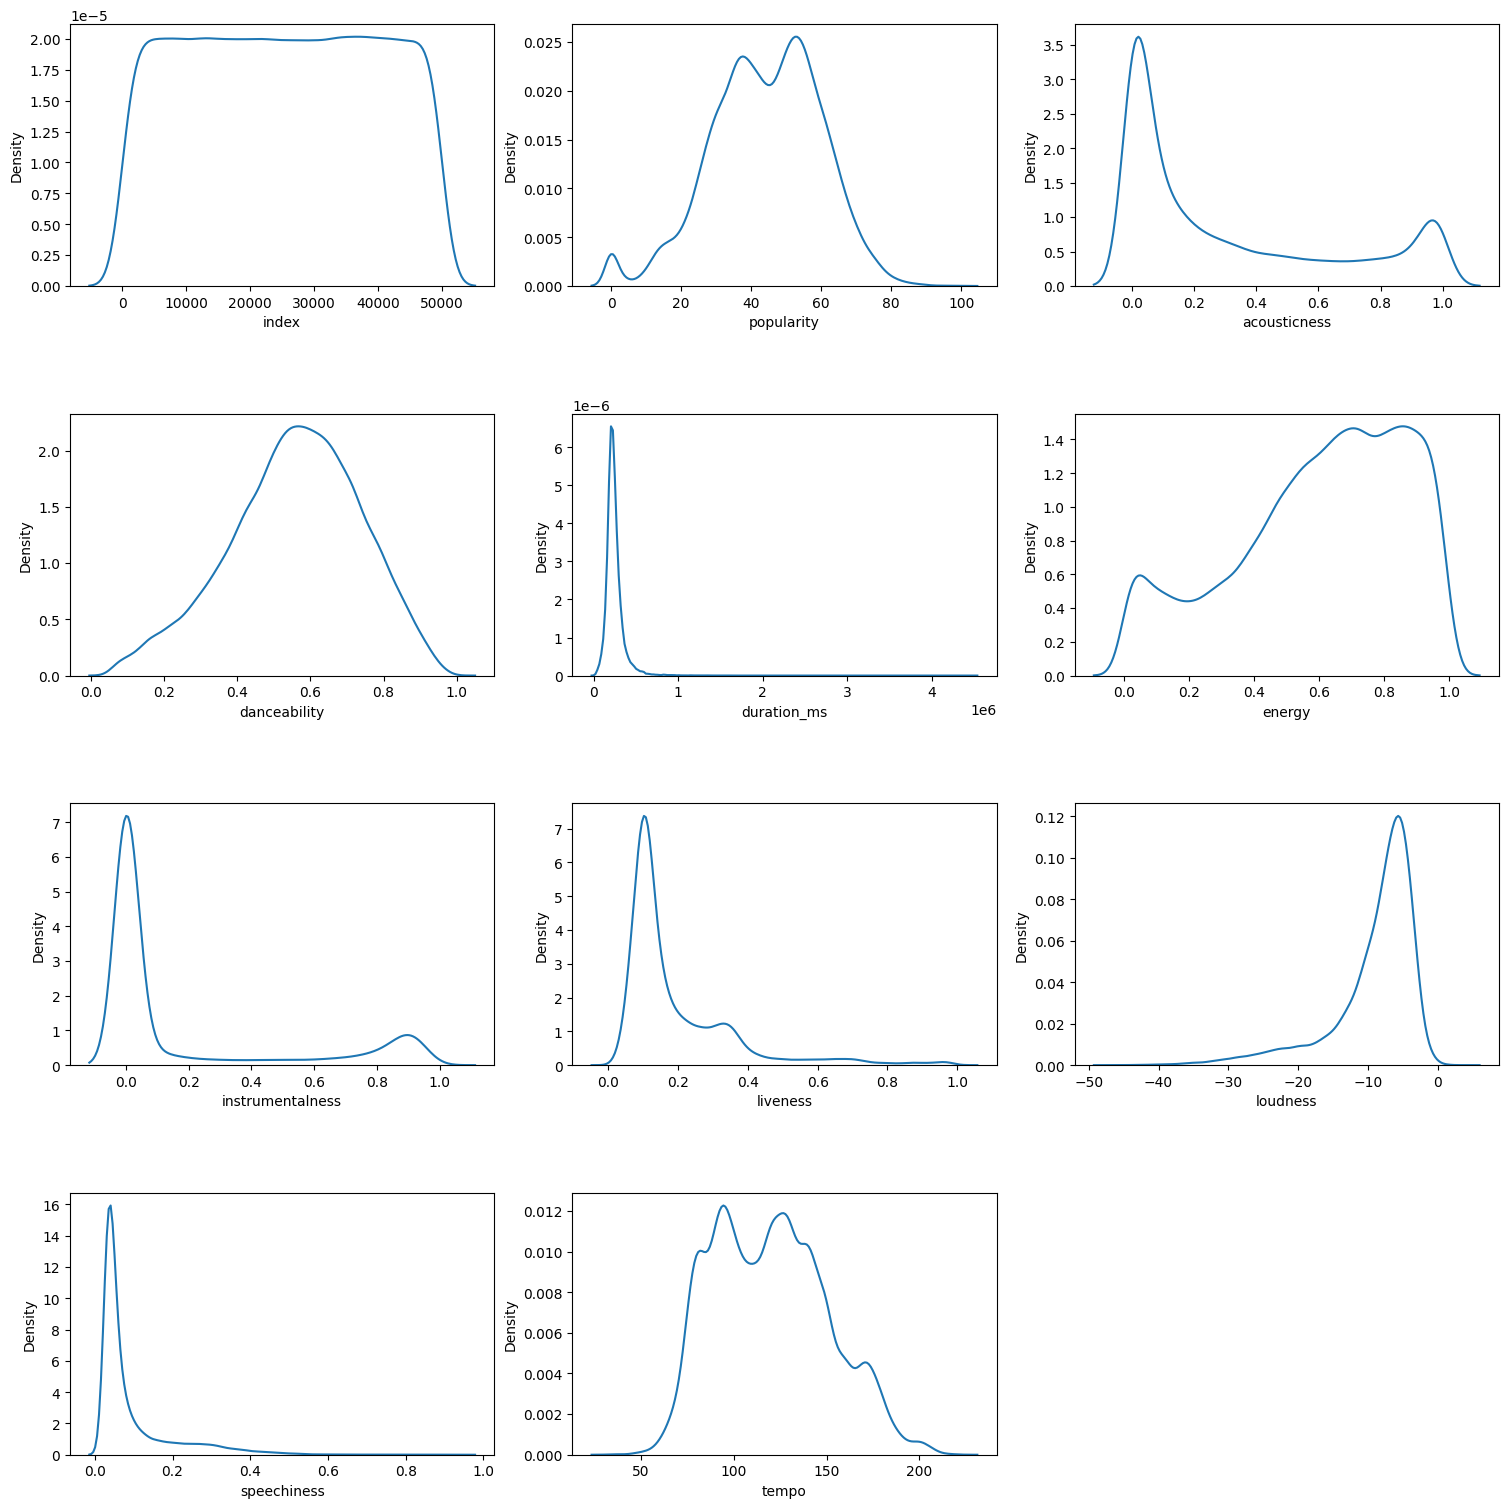

In [21]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
index = 0

axs = axs.flatten()
for k, v in numeric_features.items():
    sns.kdeplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

Popularity: Defines how popular the songs are ranging from 0 to 100. The data seems to be normally distributed. However at certain popularity level, there exists a large number of songs in that popularity level. Which seems very odd. However, it is good to see the data normally distributed to see distinct difference between the songs.

Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. From the KDEplot, most of the songs has an acousticness of 0.0 whereas the rest of songs seem to be evenly spread across 0.0 to 1.0. 
 
Danceability: How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. In the KDEplot, the model has a normal distribution. Majority of songs have the danceability of between 0.4 to 0.8. 
 
Duration_ms: The duration of the track in milliseconds. All the songs lies below 0.5x10^6 Ms marking.
 
Energy: It is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. The energy of the songs are quite widely spread across 0 to 1. Each song seems to have a different range of energy. Which may be useful in our prediction.
 
Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Almost 90% of the songs do not contains vocals. While there's about 5% of the songs do contains high instrumentalness of 0.9.
 
Liveness: Higher liveness values represent an increased probability that the track was performed live. From the KDEplot, The chances of songs recording live is not very high. With majority of the songs lies below 0.4 Liveness.

Loudness: The overall loudness of a track in decibels (dB). Values typically range between -60 and 0 db. In our dataset, majority of our songs have loudness of between -10 to 0. Relatively quiet.
 
Speechiness: It detects the presence of spoken words in a track. Values above 0.66 describe tracks that are probably made entirely of spoken words. Between 0.33 and 0.66 describe tracks that may contain both music and speech. Values below 0.33 most likely represent music and other non-speech-like tracks. In our dataset, Almost all the songs do not contains any spoken words in the track. With only a small part with 0.3 to 0.4 contain both music and speech.
 
Tempo measures the beats per minute (bpm) of a song. It is the speed or pace of a given piece and derives directly from the average beat duration. The distribution of the song tempo are quite widely spread. Every song does contain a different level of tempo. Which could be 1 of the characteristic for our prediction.
 
Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. High valence sound more positive (e.g. happy, cheerful, euphoric), while low valence sound more negative (e.g. sad, depressed, angry). The valence of the songs are quite evenly spread out. Each track in the dataset contains different valence. No outliers seen in the KDEplot.


## Boxenplot

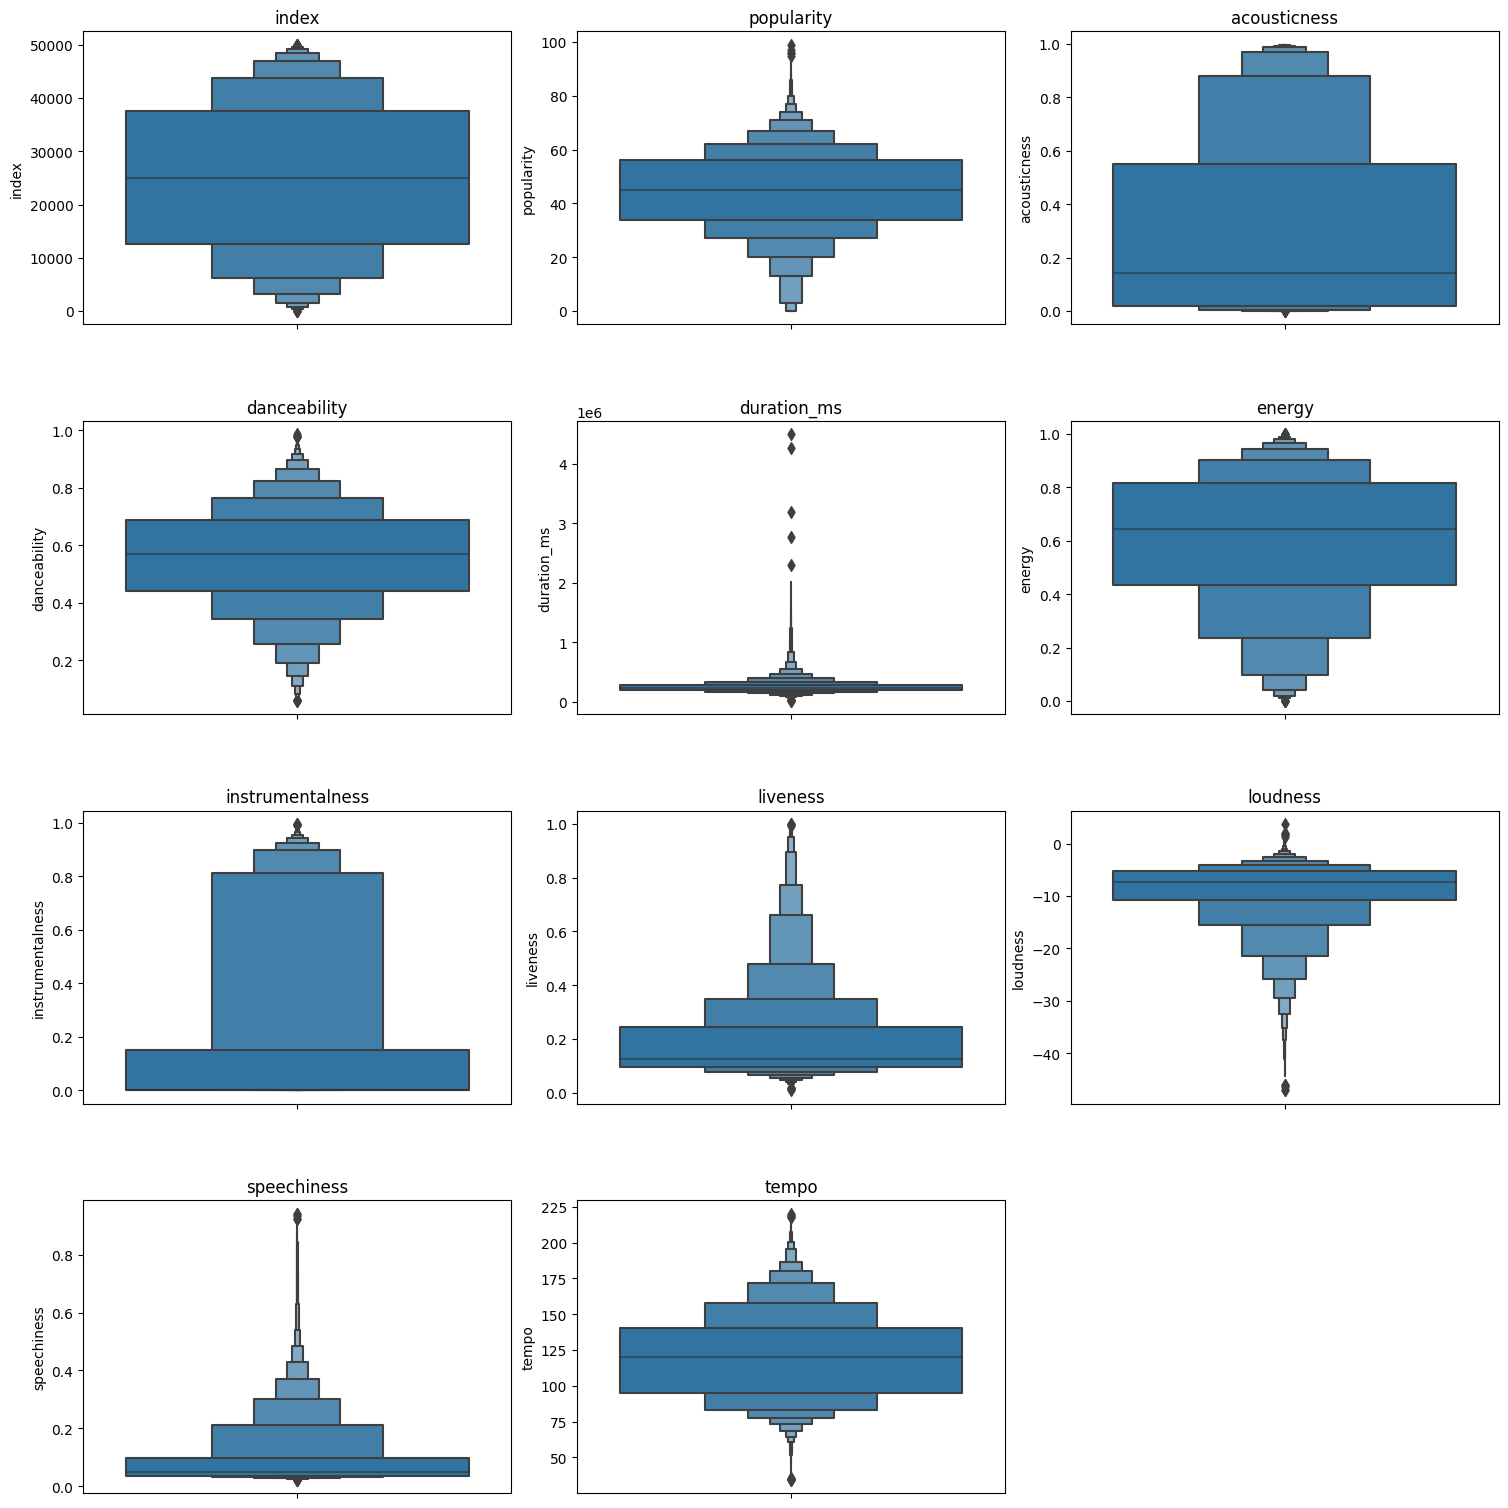

In [22]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
idx = 0
axs = axs.flatten()
for k, v in numeric_features.items():
    sns.boxenplot(y=v, ax=axs[idx])
    axs[idx].set_title(k)
    idx += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


Boxen plots: Boxen plots (also known as letter-value plots) are similar to box plots but provide more detail about the distribution, particularly in the tails. They can be useful for identifying outliers in datasets with complex distributions.

The data displays a few outliers in popularity, danceability, and tempo, while duration, instrumentalness, liveness, loudness, and speechiness have a large number of extreme values. Although it is common practice to remove outliers to prevent them from distorting model training and inference, in this case, the aim is to interpret classification outputs rather than creating the best model. Therefore, the outliers are not removed.

## 3c) Correlation between song genre and every variable. 

Variables with high correlation will be the predictors for our response. 
Below are the boxplots showing the correlation between song genres and acousticness

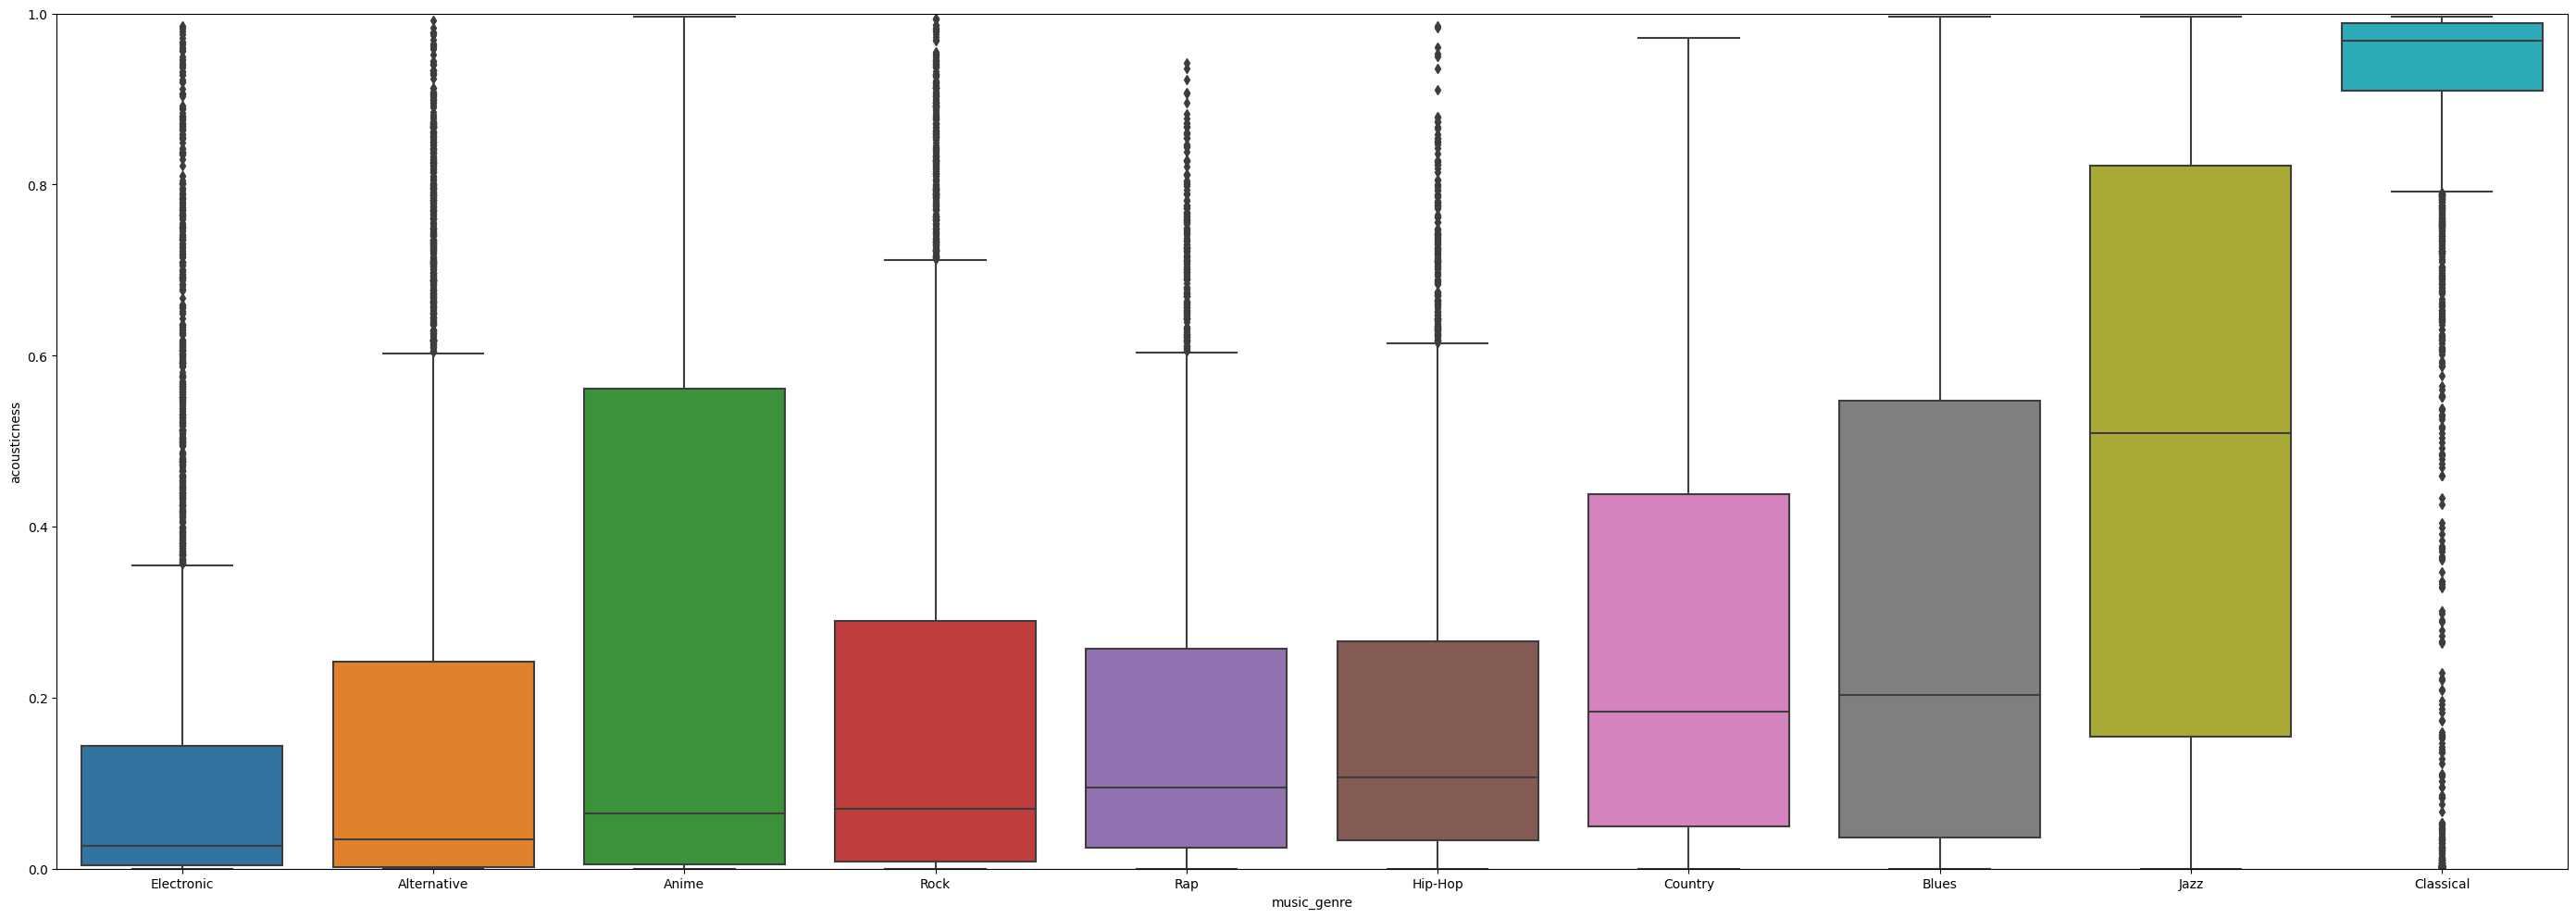

In [23]:
group_means=music.groupby(['music_genre'])['acousticness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0,1.0)
sns.boxplot(x='music_genre', y='acousticness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and energy

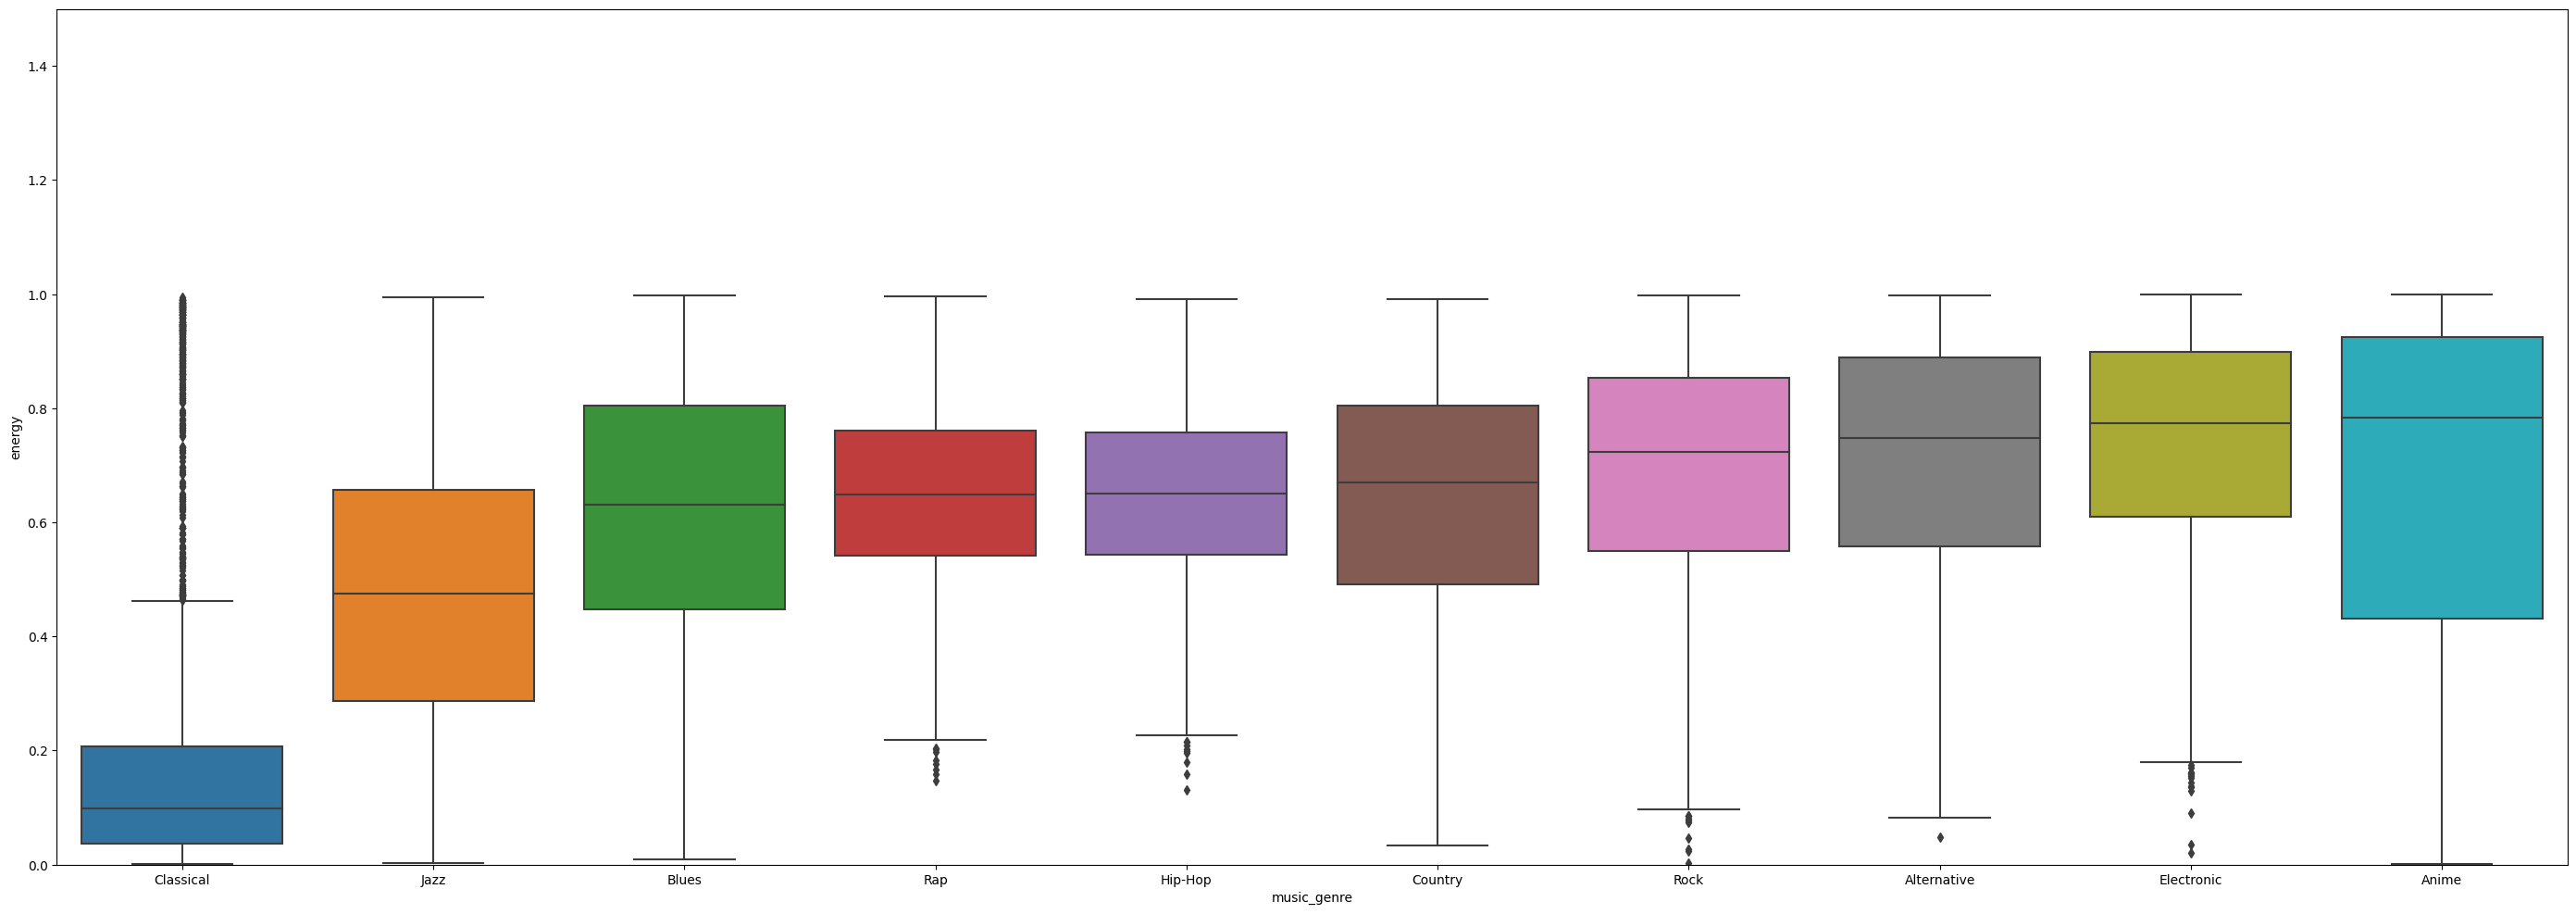

In [24]:
group_means=music.groupby(['music_genre'])['energy'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='energy', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and popularity

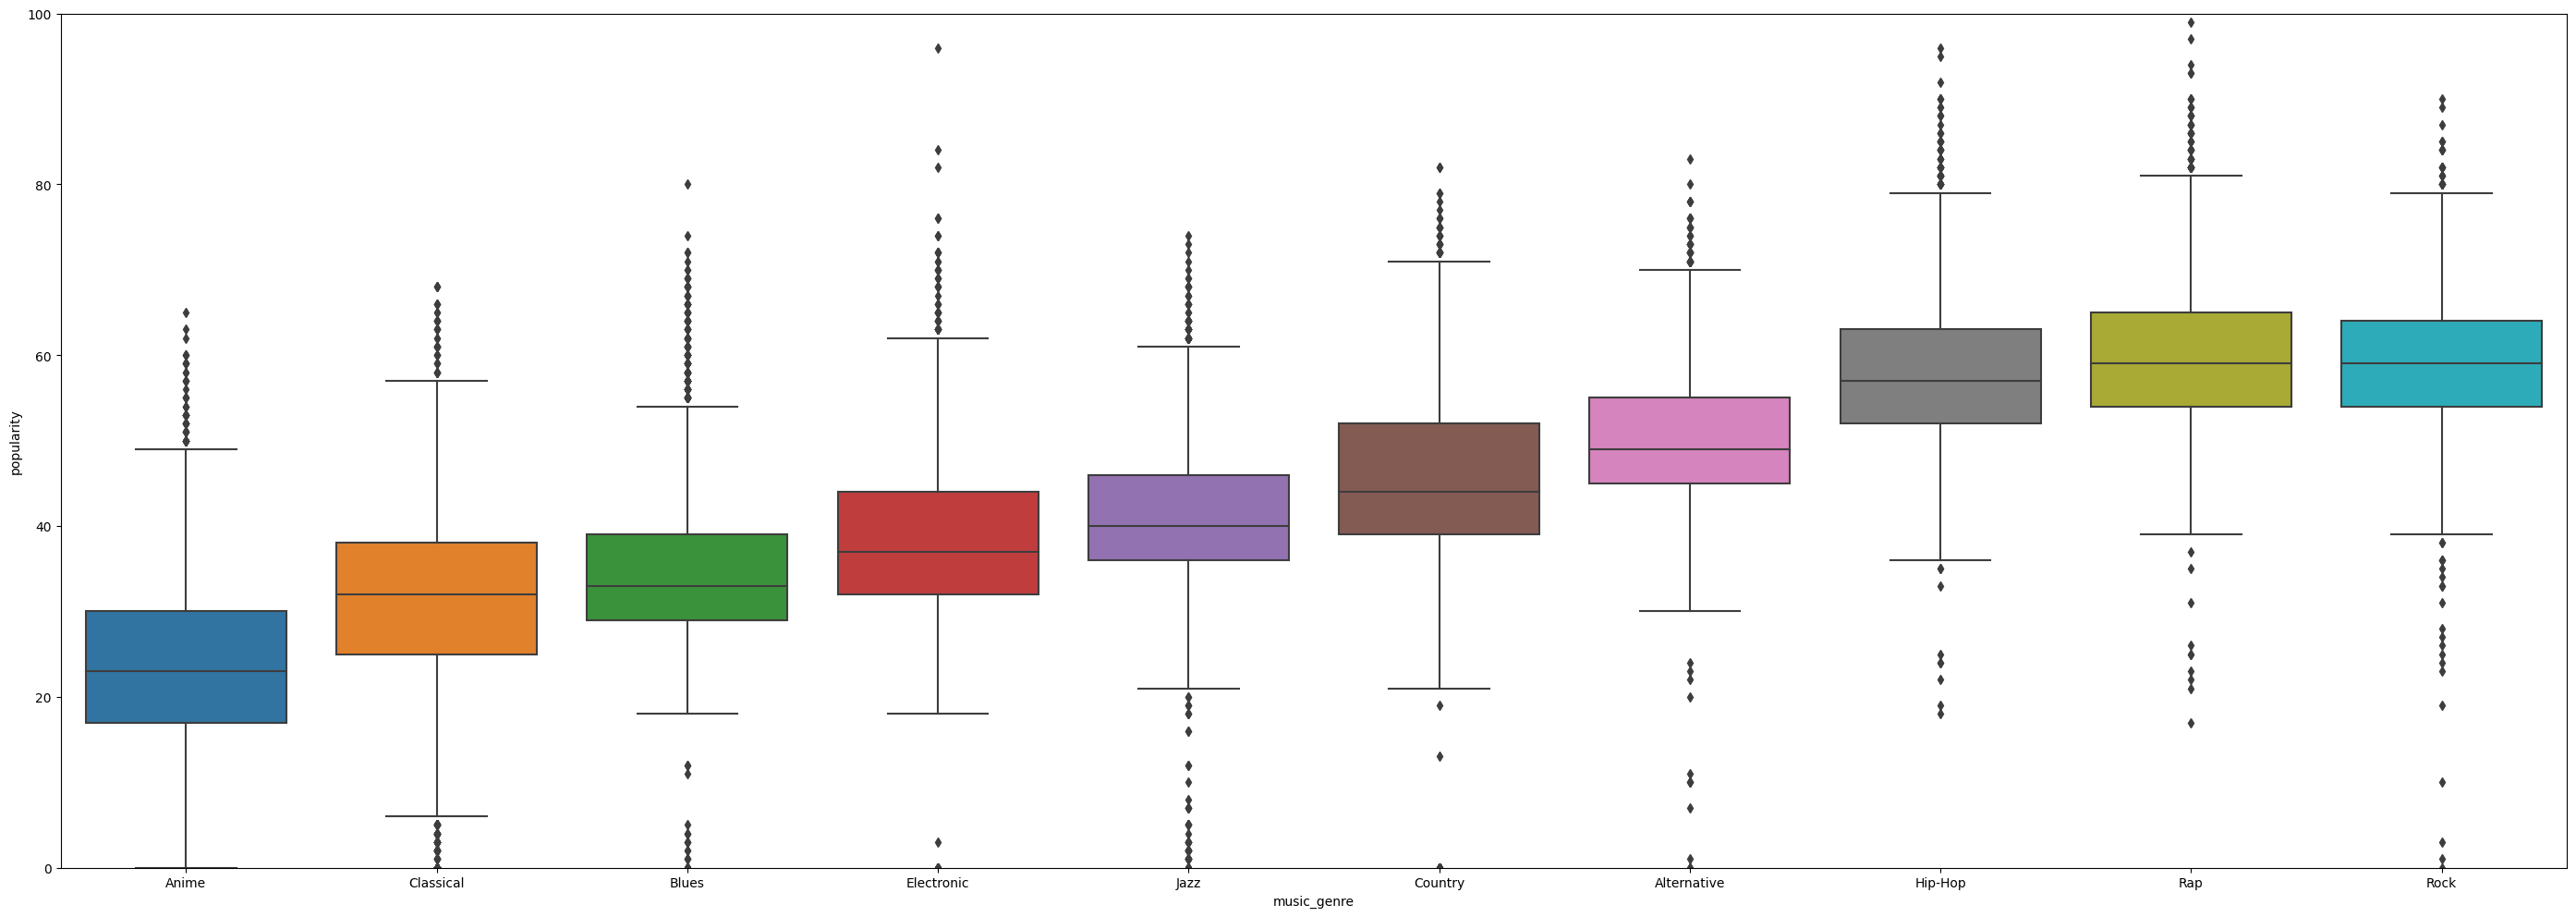

In [25]:
group_means=music.groupby(['music_genre'])['popularity'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,100)
sns.boxplot(x='music_genre', y='popularity', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and danceability

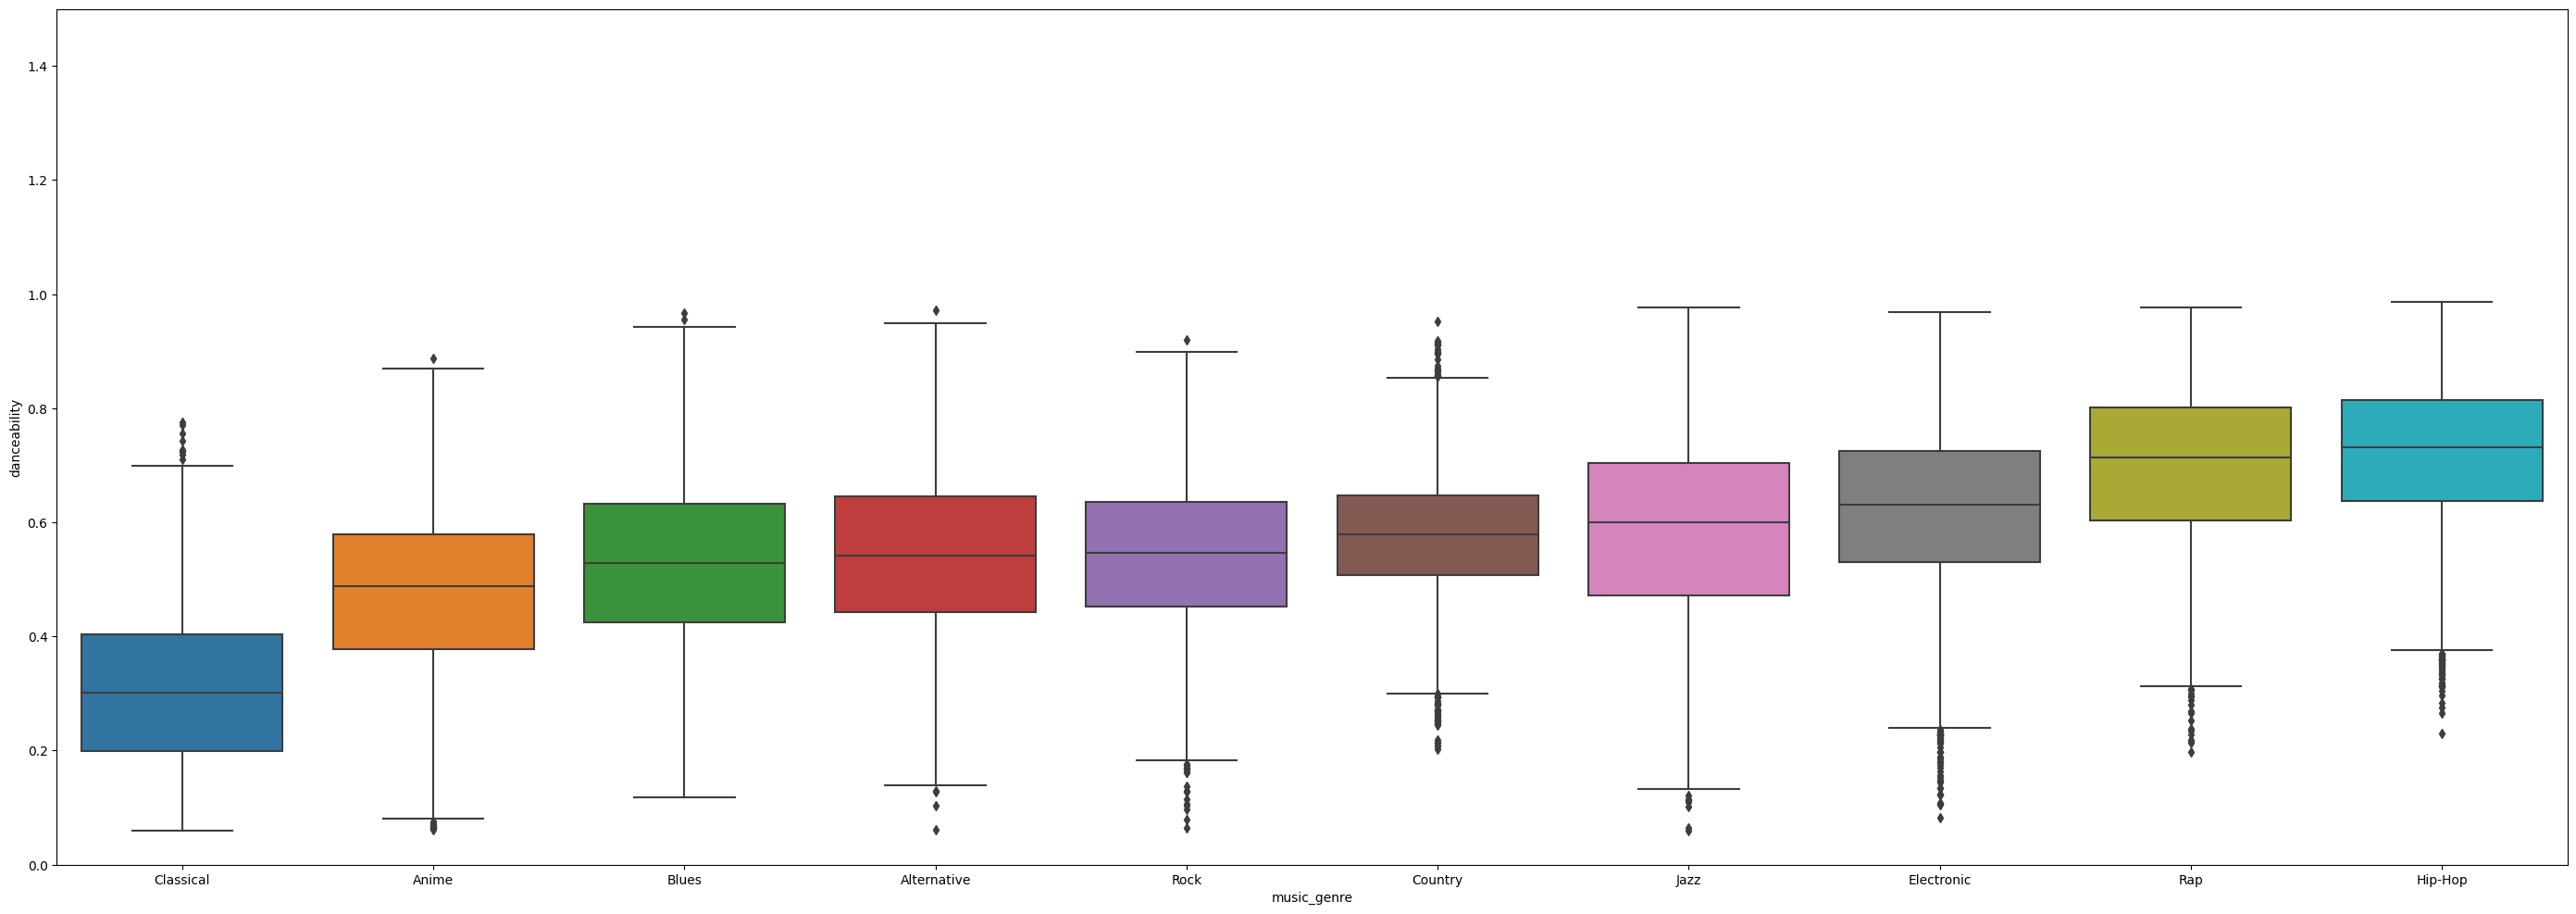

In [26]:
group_means=music.groupby(['music_genre'])['danceability'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='danceability', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and duration_ms

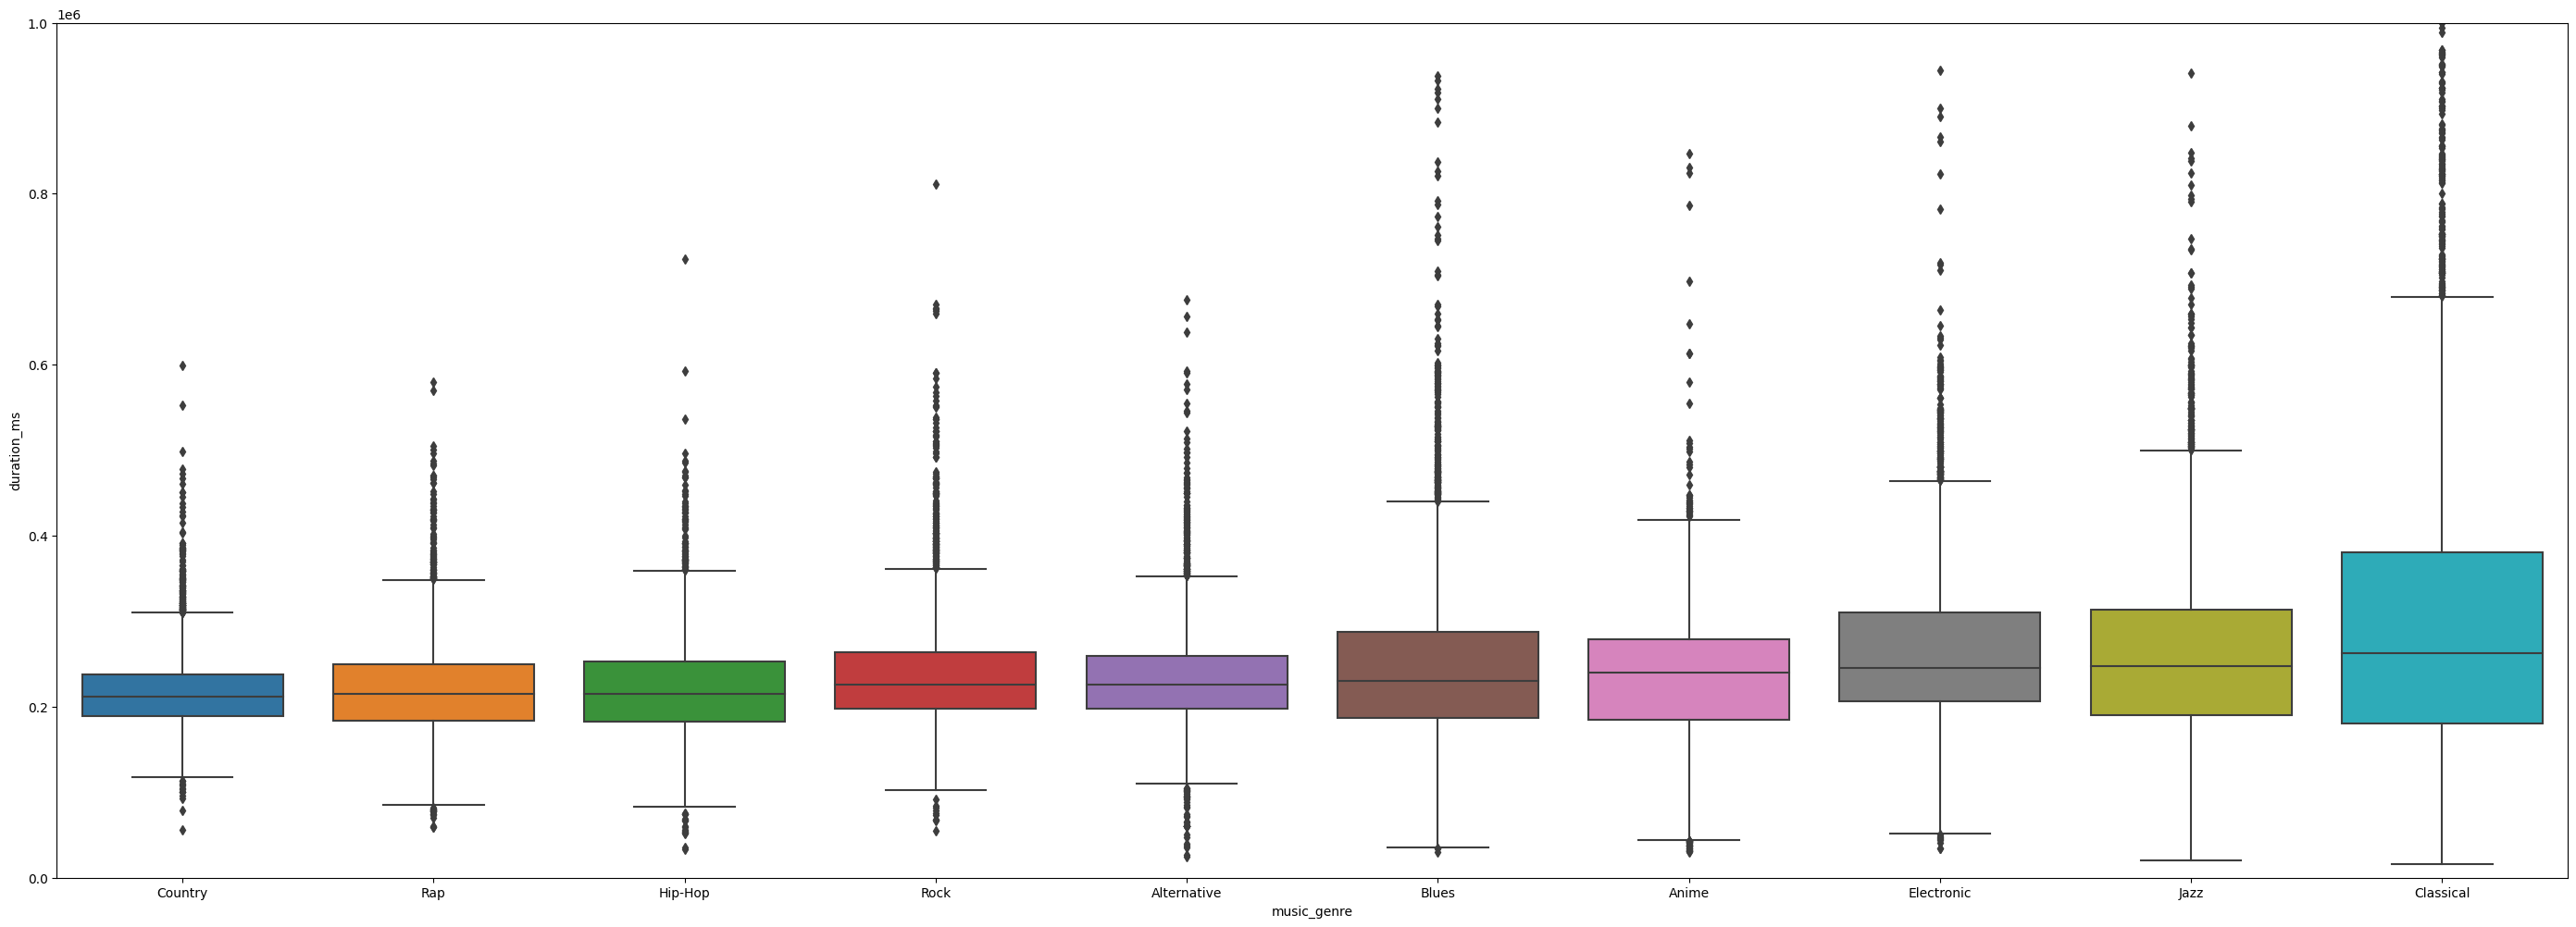

In [27]:
group_means=music.groupby(['music_genre'])['duration_ms'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1000000)
sns.boxplot(x='music_genre', y='duration_ms', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and liveness

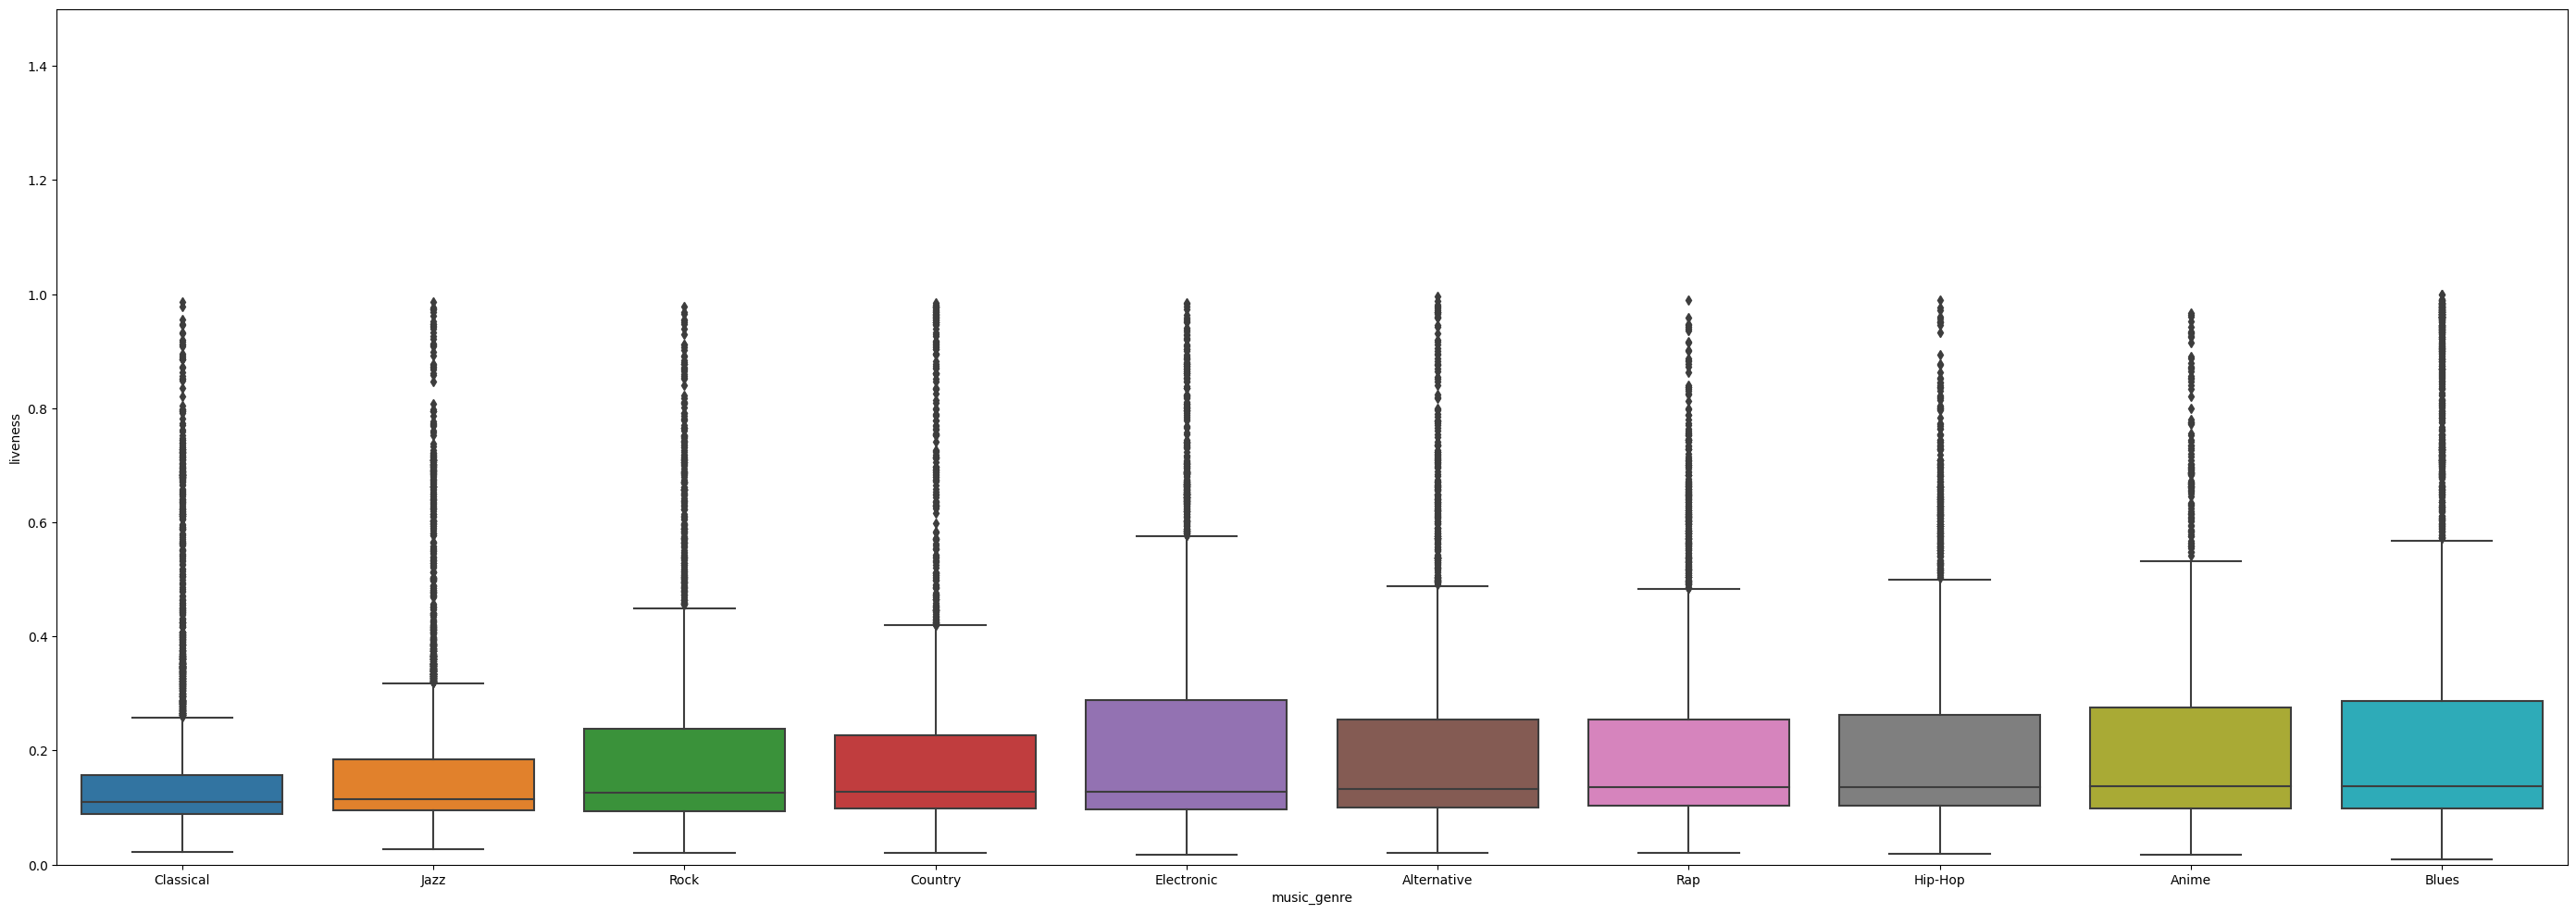

In [28]:
group_means=music.groupby(['music_genre'])['liveness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='liveness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and loudness

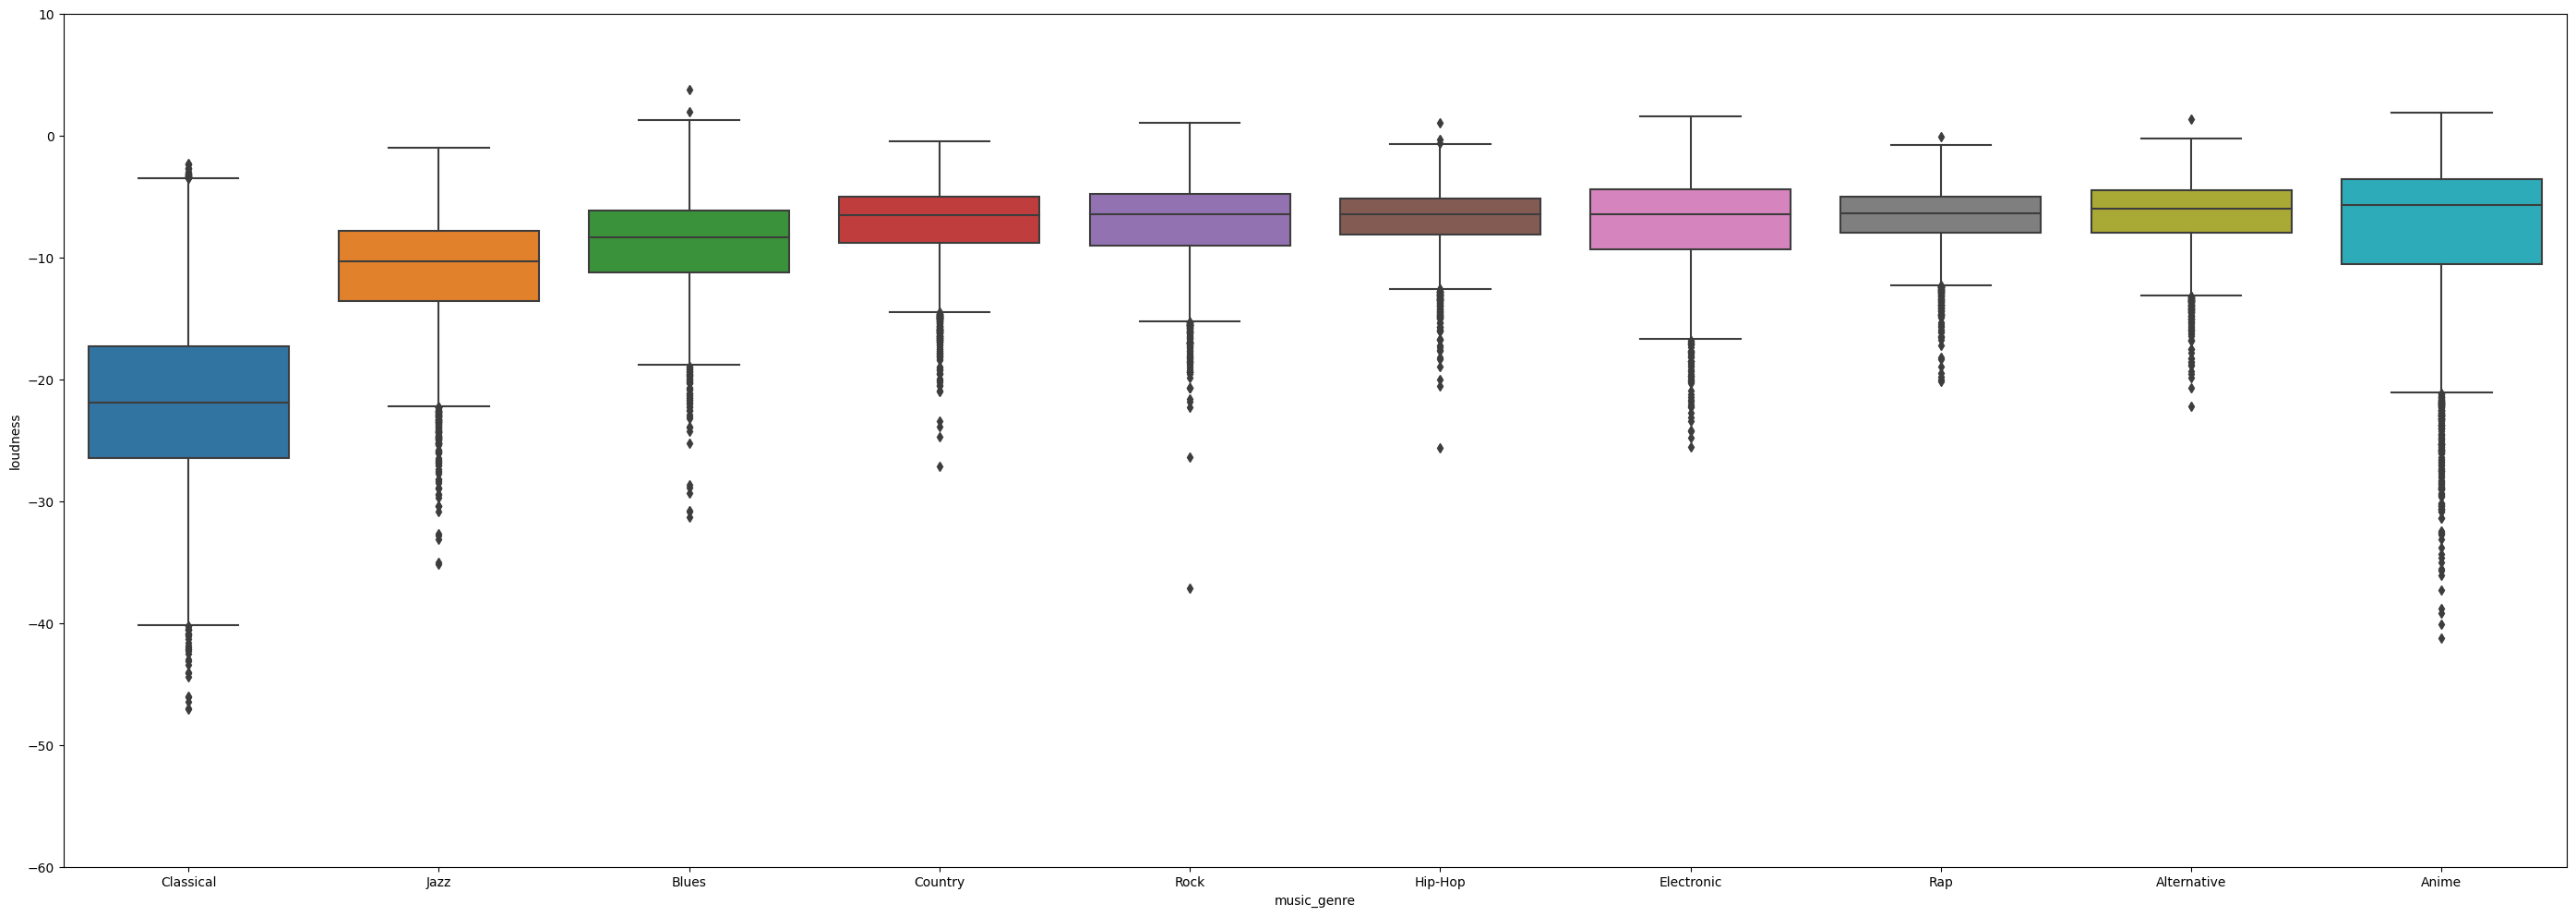

In [29]:
group_means=music.groupby(['music_genre'])['loudness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(-60,10)
sns.boxplot(x='music_genre', y='loudness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and speechiness

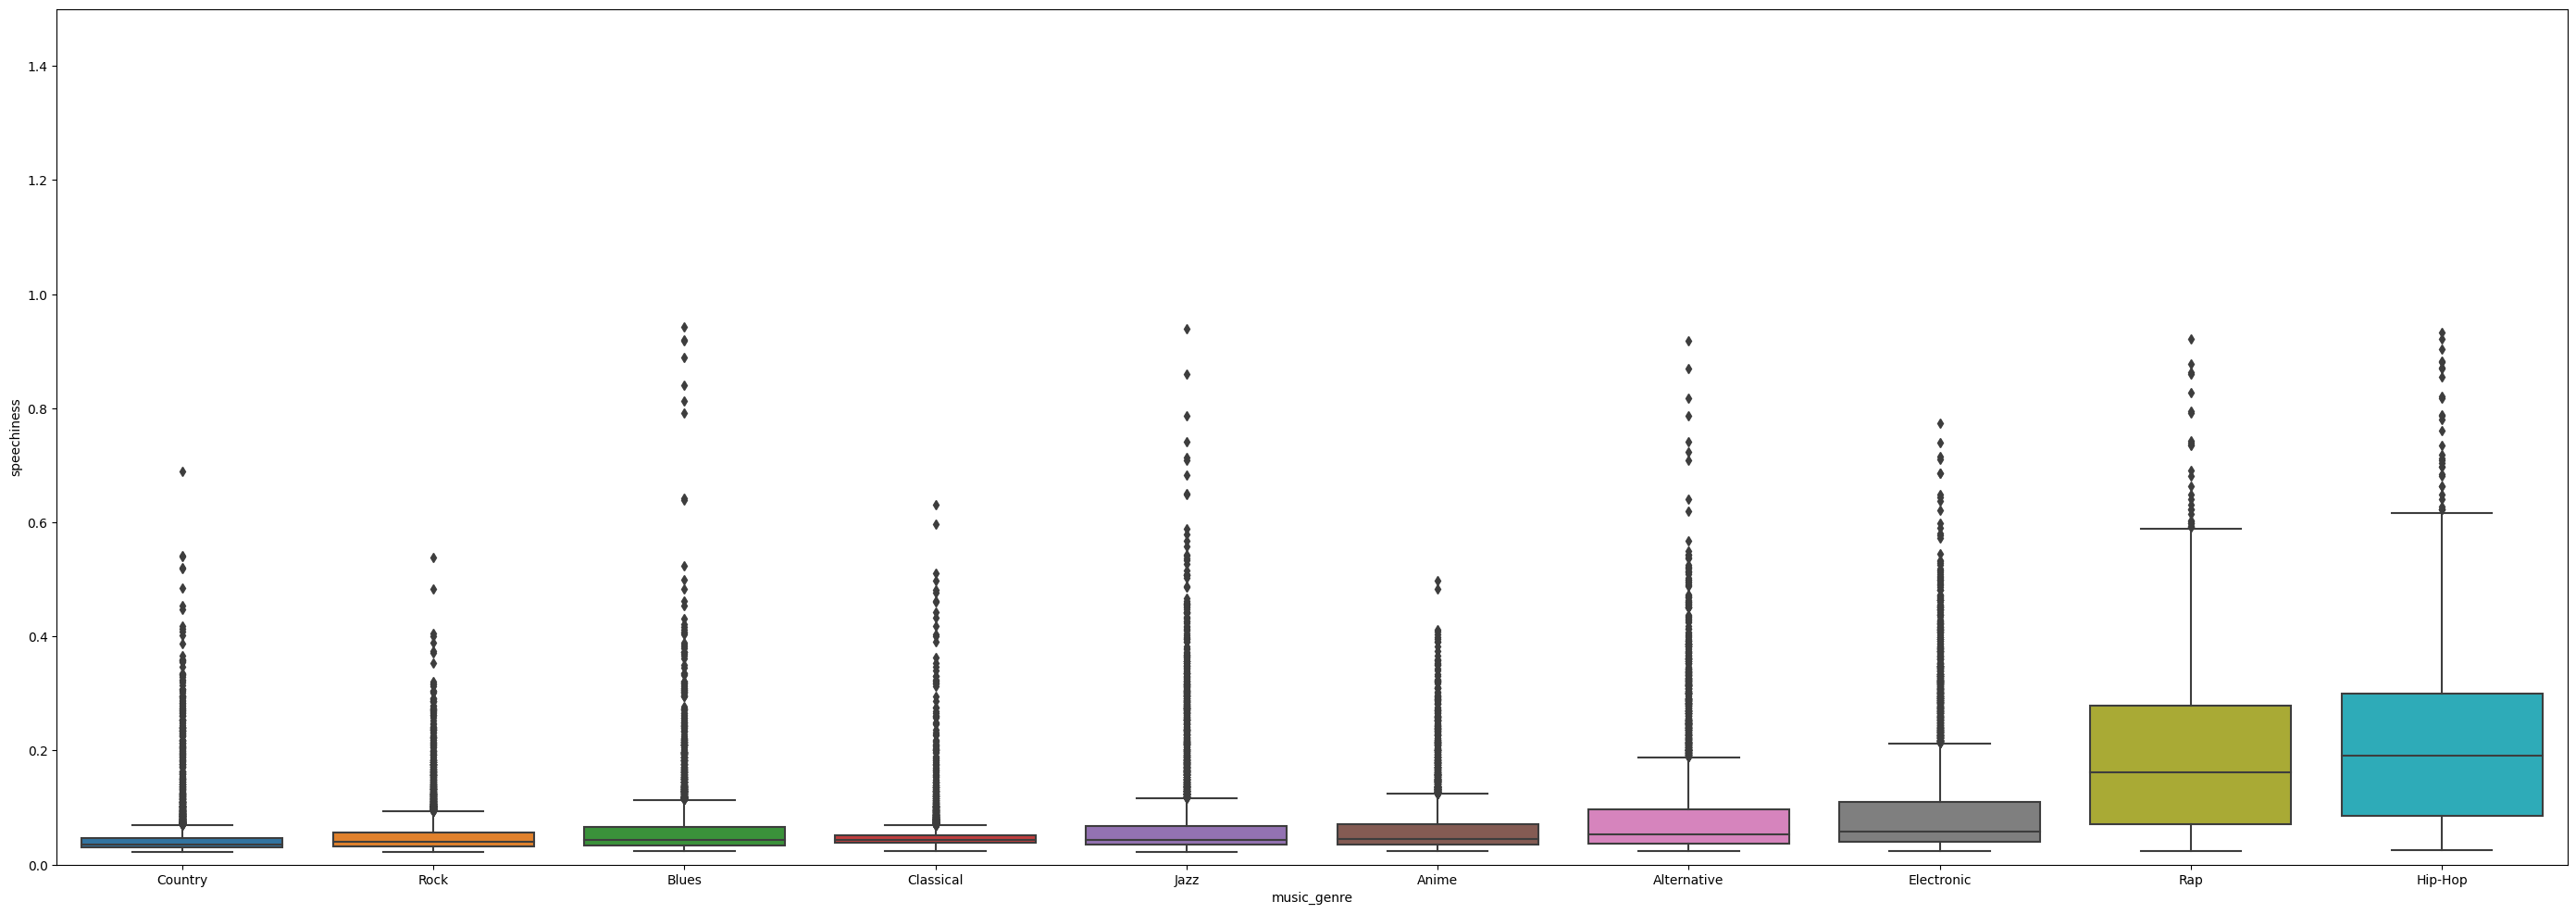

In [30]:
group_means=music.groupby(['music_genre'])['speechiness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='speechiness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and valence

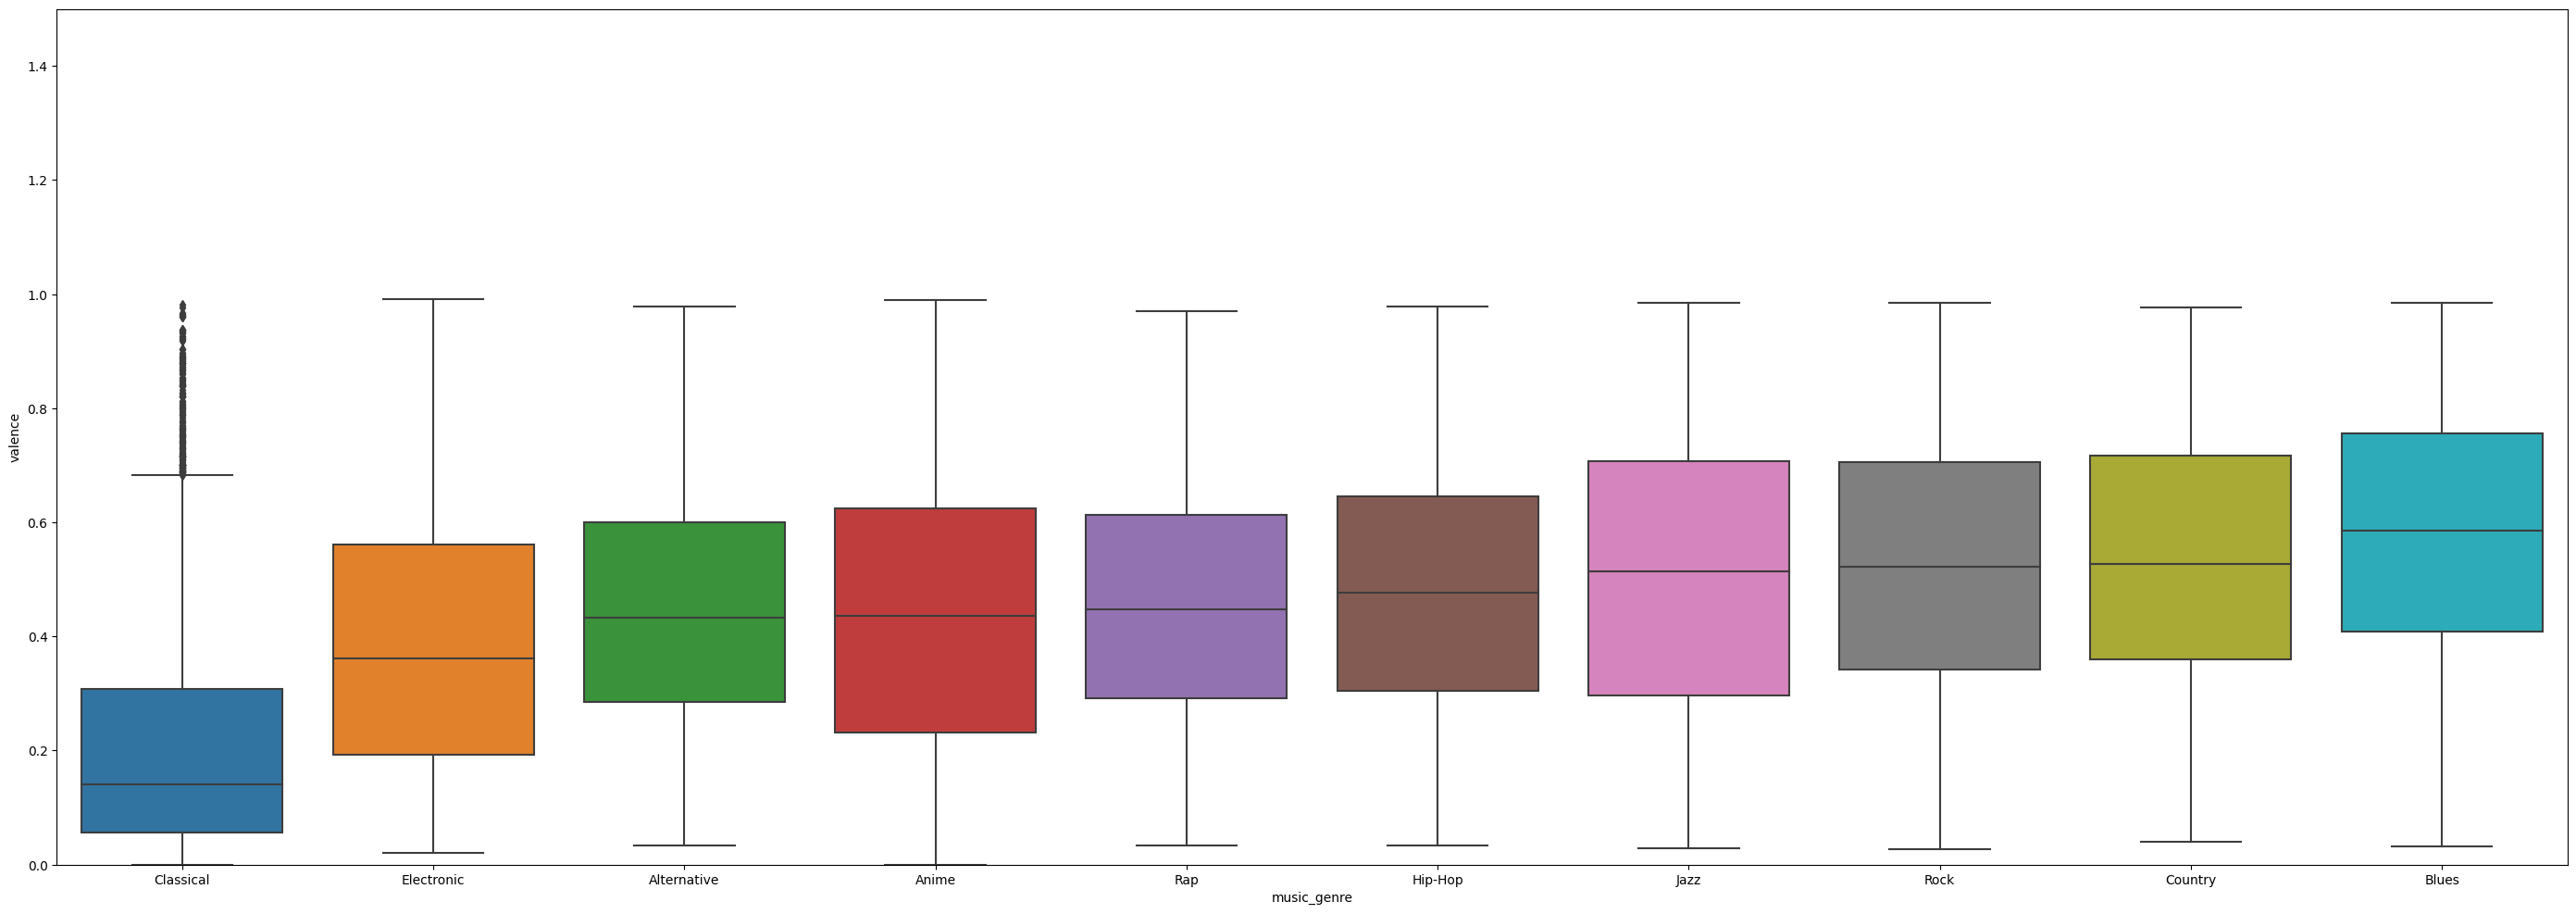

In [31]:
group_means=music.groupby(['music_genre'])['valence'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='valence', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and tempo

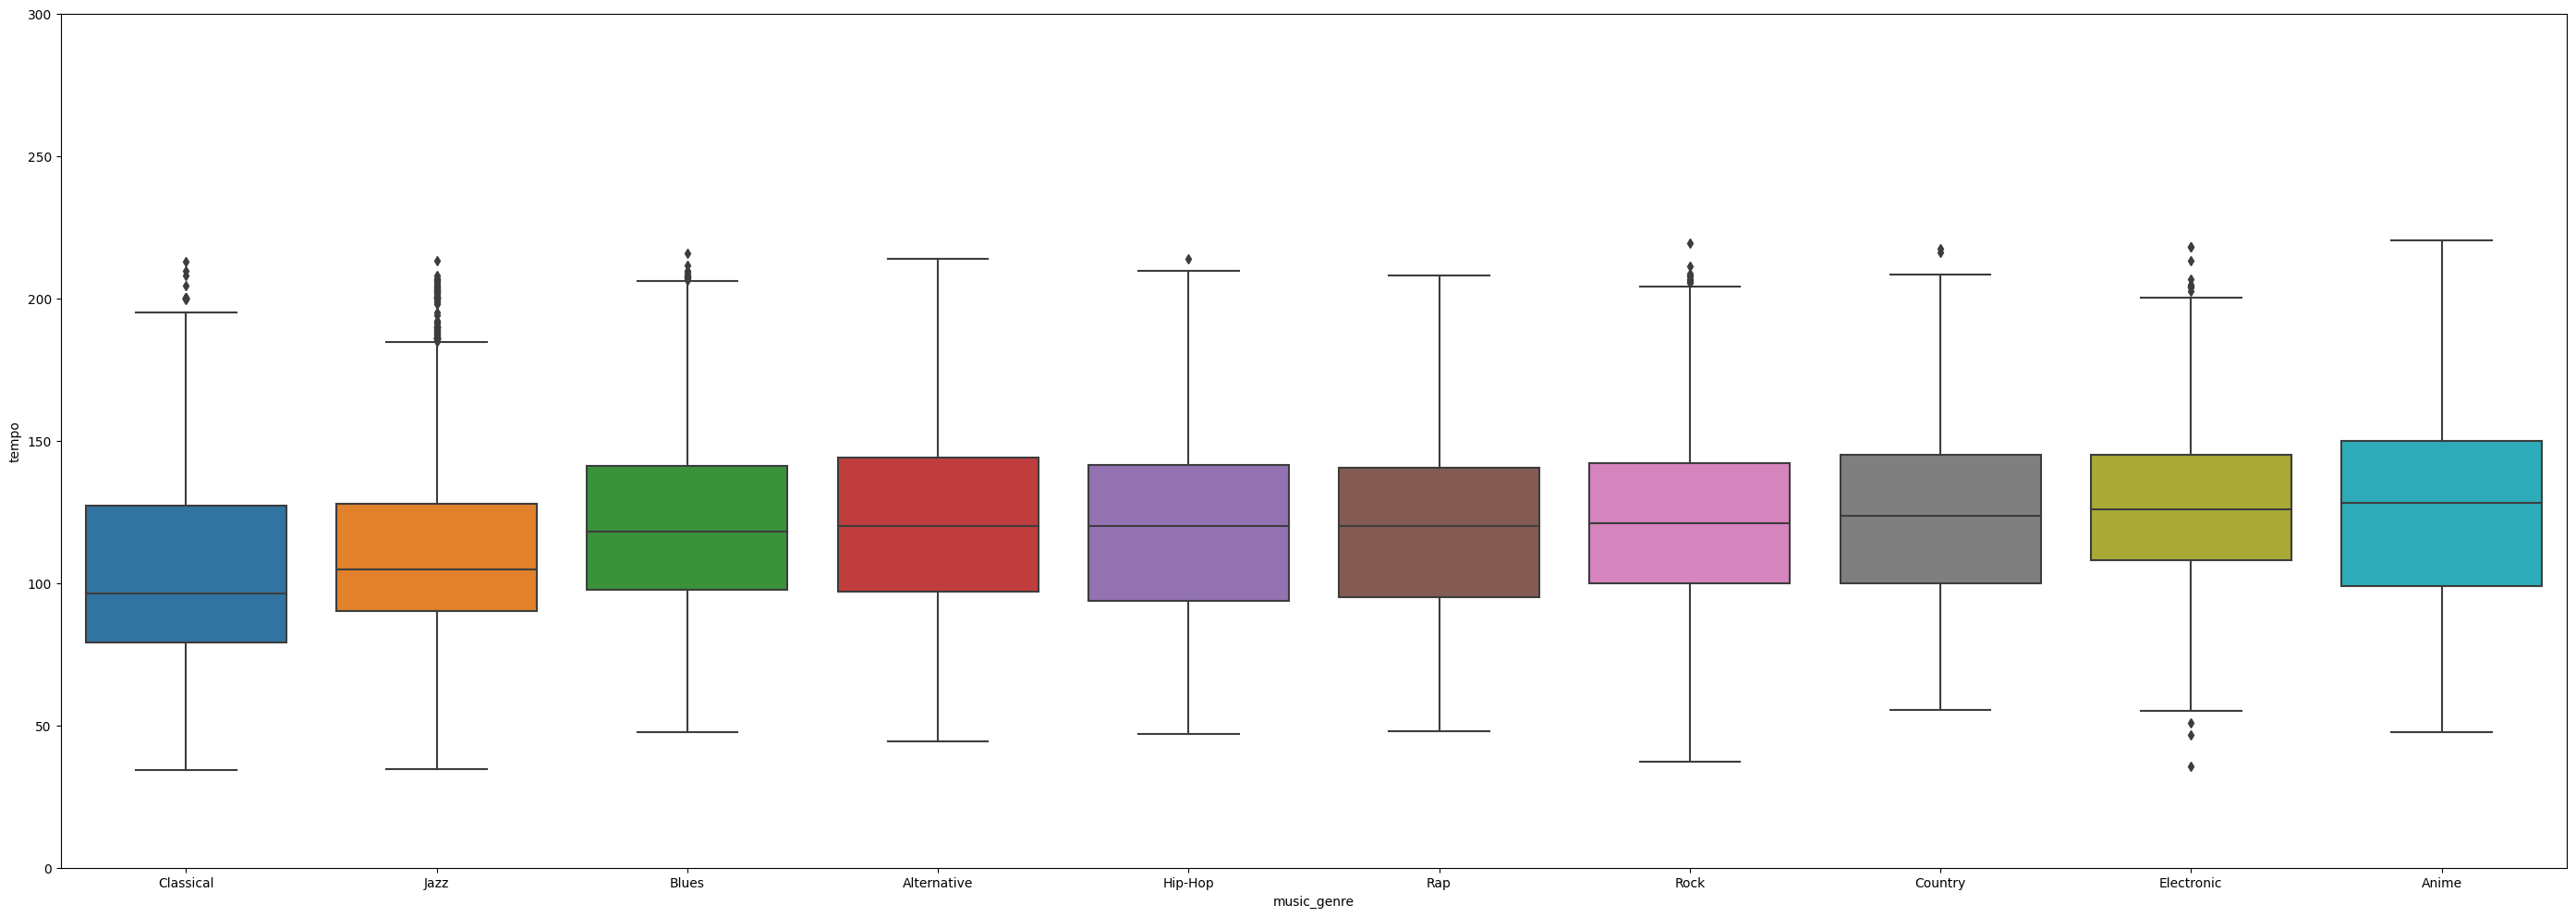

In [32]:
group_means=music.groupby(['music_genre'])['tempo'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0,300)
sns.boxplot(x='music_genre', y='tempo', order=group_means.index,data=music)
plt.show()

Of all the numeric variables, the line connecting the medians of the boxplots in popularity vs genre was the closest to linear. This means that different genres enjoy different levels of popularity, with Hip-Hop and R&B being the most popular genres and Classical the Least.

Even though the correlation between the remaining variables was not that high, there was still a slight association between each characteristic and the corresponding genre, for instance, the variable "Loudness." Out of all the variables, loudness has the weakest correlation. The line linking the boxplot medians resembles a horizontal line and boxplots are overlapping each other. However, the spread of each boxplot between the first quartile and third quartile still varies slightly. This tiny discrepancy might aid in determining the genre. 

In this project, we have decided to use all numeric variables as the predictors for certain reasons. Firstly, we have many genre classes, it is really hard to predict the type of genre based on a few numeric variables. Based on the graph for each numeric variable, most of the genre classes have about the same median and spread between first quartile and third quartile. It will be very hard to do machine learning if there’s only a few predictors. Only with all numeric variables as predictors, can we distinguish the difference.

## Chi - Square Test

Now, we will calculate the correlation between the categorical variables and the genre. This will help us understand the relation between the variables, following which we will have a clearer idea of which variables to choose as our predictors.

The correlation will be calculated using the Chi-Square Test, which finds the probability of a null hypothesis (H0). It starts out with the hypothesis H0 : that the two categorical variables are not related to each other. It then generates the probability, called the p-value, that the hypothesis is true, i.e. they are not related to each other.

If the returned p-value is above 0.5, usually we can assume that the two variables are not related. If the p-value falls below 0.5, they have a fairly strong correlation.

Below is the calculation of p-value for acousticness and genre.

In [33]:
music.dtypes


index                 int64
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
valence             float64
music_genre          object
dtype: object

As we can see here, the categorical variables apart from genre are 'key' and 'mode'. We will now calculate the p-values of these variables with the categorical variable 'genre'.

In [34]:
# importing required functions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

Below is the p-value calculation for genre and key.

In [35]:
# contingency table
table = pd.crosstab(music['music_genre'],music['key'], margins = False)
stat, p, dof, expected = chi2_contingency(table)
print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")


chi2 statistic:     2022.8
p-value:            0
degrees of freedom: 99


Below is the p-value calculation for genre and mode of the song.

In [36]:
# contingency table
table = pd.crosstab(music['music_genre'],music['mode'], margins = False)
stat, p, dof, expected = chi2_contingency(table)
print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")


chi2 statistic:     1898.1
p-value:            0
degrees of freedom: 9


As we can see from the above calculations, the p-values for all of these variables is 0.0, which could be read to imply that the genre of the song is dependent on all these variables. However, this could also be because the frequencies or counts vary by large amounts across the columns. We will consider these variables in our prediction model because they clearly have a correlation with the genre of the song.

# 4a) Machine Learning

We will use 2 predictive models to discover possible patterns in our dataset and make predictions based on them.

#### 4a) Encode categorical data

Machine learning models require all input and output variables to be numeric. Since our data consists of categorical variable, we must encode it to numbers before fitting and evaluate a model. In our case, we have used one-hot encoder. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. In the context of this project, key variable has a total of 12 classes. Each class will be represented by a integer value. We not encoding music genre because it represents the label. 

Encoding key feature

In [37]:
music['key'].replace(['A','A#','B','C','C#','D','D#','E','F','F#','G','G#'],
                        [0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)
music.head()

,index,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,1,31.0,0.01270,0.622,218293.0,0.890,0.950000,5,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
1,2,28.0,0.00306,0.620,215613.0,0.755,0.011800,11,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
2,3,34.0,0.02540,0.774,166875.0,0.700,0.002530,4,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
3,4,32.0,0.00465,0.638,222369.0,0.587,0.909000,9,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
4,6,46.0,0.02890,0.572,214408.0,0.803,0.000008,2,0.106,-4.294,Major,0.3510,149.995,0.230,Electronic


Encoding mode feature

In [38]:
music['mode'].replace(['Major','Minor'],
                        [0,1], inplace=True)
music.head()

,index,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,1,31.0,0.01270,0.622,218293.0,0.890,0.950000,5,0.124,-7.043,1,0.0300,115.002,0.531,Electronic
1,2,28.0,0.00306,0.620,215613.0,0.755,0.011800,11,0.534,-4.617,0,0.0345,127.994,0.333,Electronic
2,3,34.0,0.02540,0.774,166875.0,0.700,0.002530,4,0.157,-4.498,0,0.2390,128.014,0.270,Electronic
3,4,32.0,0.00465,0.638,222369.0,0.587,0.909000,9,0.157,-6.266,0,0.0413,145.036,0.323,Electronic
4,6,46.0,0.02890,0.572,214408.0,0.803,0.000008,2,0.106,-4.294,0,0.3510,149.995,0.230,Electronic


#### 4b) Exploration and Visualization

Perform basic statistical exploration and visualization on the Train Set.


We will start by setting up a Multi-Variate Classification problem.   



In [39]:
# Extract Response and Predictors
y = pd.DataFrame(music["music_genre"])
predictors = ["popularity","acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","valence"]
X = pd.DataFrame(music[predictors]) 

In [40]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (30420, 1) (30420, 13)
Test Set  : (10140, 1) (10140, 13)


In [41]:
# Summary Statistics for Response
y_train["music_genre"].value_counts()

Alternative    3108
Rock           3090
Anime          3079
Jazz           3041
Blues          3041
Country        3039
Hip-Hop        3033
Rap            3011
Classical      2998
Electronic     2980
Name: music_genre, dtype: int64

In [42]:
# Summary Statistics for Predictors
X_train.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,30420.000000,30420.000000,30420.000000,3.042000e+04,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000
mean,44.229586,0.305626,0.558622,2.456463e+05,0.600081,0.180682,5.356443,0.194244,-9.113715,0.360585,0.093526,120.022081,0.457651
std,15.584884,0.341085,0.178827,1.088025e+05,0.263861,0.325227,3.461938,0.162331,6.128917,0.480178,0.101481,30.595555,0.246898
min,0.000000,0.000000,0.059600,1.631600e+04,0.000792,0.000000,0.000000,0.009670,-46.985000,0.000000,0.022300,34.469000,0.000000
25%,34.000000,0.020000,0.442000,1.908000e+05,0.433000,0.000000,3.000000,0.096800,-10.836000,0.000000,0.036100,94.979000,0.259000
50%,45.000000,0.143000,0.569000,2.276000e+05,0.643000,0.000148,5.000000,0.127000,-7.276000,0.000000,0.048900,119.937000,0.450000
75%,56.000000,0.550000,0.687000,2.758720e+05,0.815000,0.146000,8.000000,0.244000,-5.176750,1.000000,0.097900,140.495250,0.649000
max,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,11.000000,1.000000,3.744000,1.000000,0.942000,220.276000,0.992000


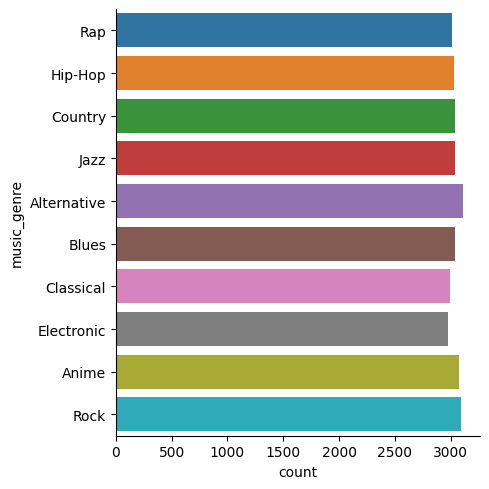

In [43]:
# Draw the distribution of Response
sns.catplot(y = "music_genre", data = y_train, kind = "count")

## 4c) Classification Tree

In [44]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
y_predict = dectree.fit(X_train,y_train).predict(X_test)


[Text(0.5, 0.875, 'popularity <= 47.5\ngini = 0.9\nsamples = 30420\nvalue = [3108, 3079, 3041, 2998, 3039, 2980, 3033, 3041, 3011\n3090]\nclass = Classical'),
 Text(0.25, 0.625, 'loudness <= -16.802\ngini = 0.852\nsamples = 16751\nvalue = [1228, 3019, 2749, 2826, 1877, 2486, 123, 2375, 31\n37]\nclass = Jazz'),
 Text(0.125, 0.375, 'danceability <= 0.494\ngini = 0.419\nsamples = 2916\nvalue = [6, 302, 92, 2184, 17, 42, 2, 270, 0, 1]\nclass = Rock'),
 Text(0.0625, 0.125, 'gini = 0.301\nsamples = 2469\nvalue = [3, 227, 28, 2046, 5, 16, 0, 143, 0, 1]\nclass = Rock'),
 Text(0.1875, 0.125, 'gini = 0.771\nsamples = 447\nvalue = [3, 75, 64, 138, 12, 26, 2, 127, 0, 0]\nclass = Rock'),
 Text(0.375, 0.375, 'popularity <= 25.5\ngini = 0.842\nsamples = 13835\nvalue = [1222, 2717, 2657, 642, 1860, 2444, 121, 2105, 31, 36]\nclass = Jazz'),
 Text(0.3125, 0.125, 'gini = 0.502\nsamples = 2357\nvalue = [12, 1615, 334, 110, 37, 181, 4, 56, 4, 4]\nclass = Jazz'),
 Text(0.4375, 0.125, 'gini = 0.84\nsamples =

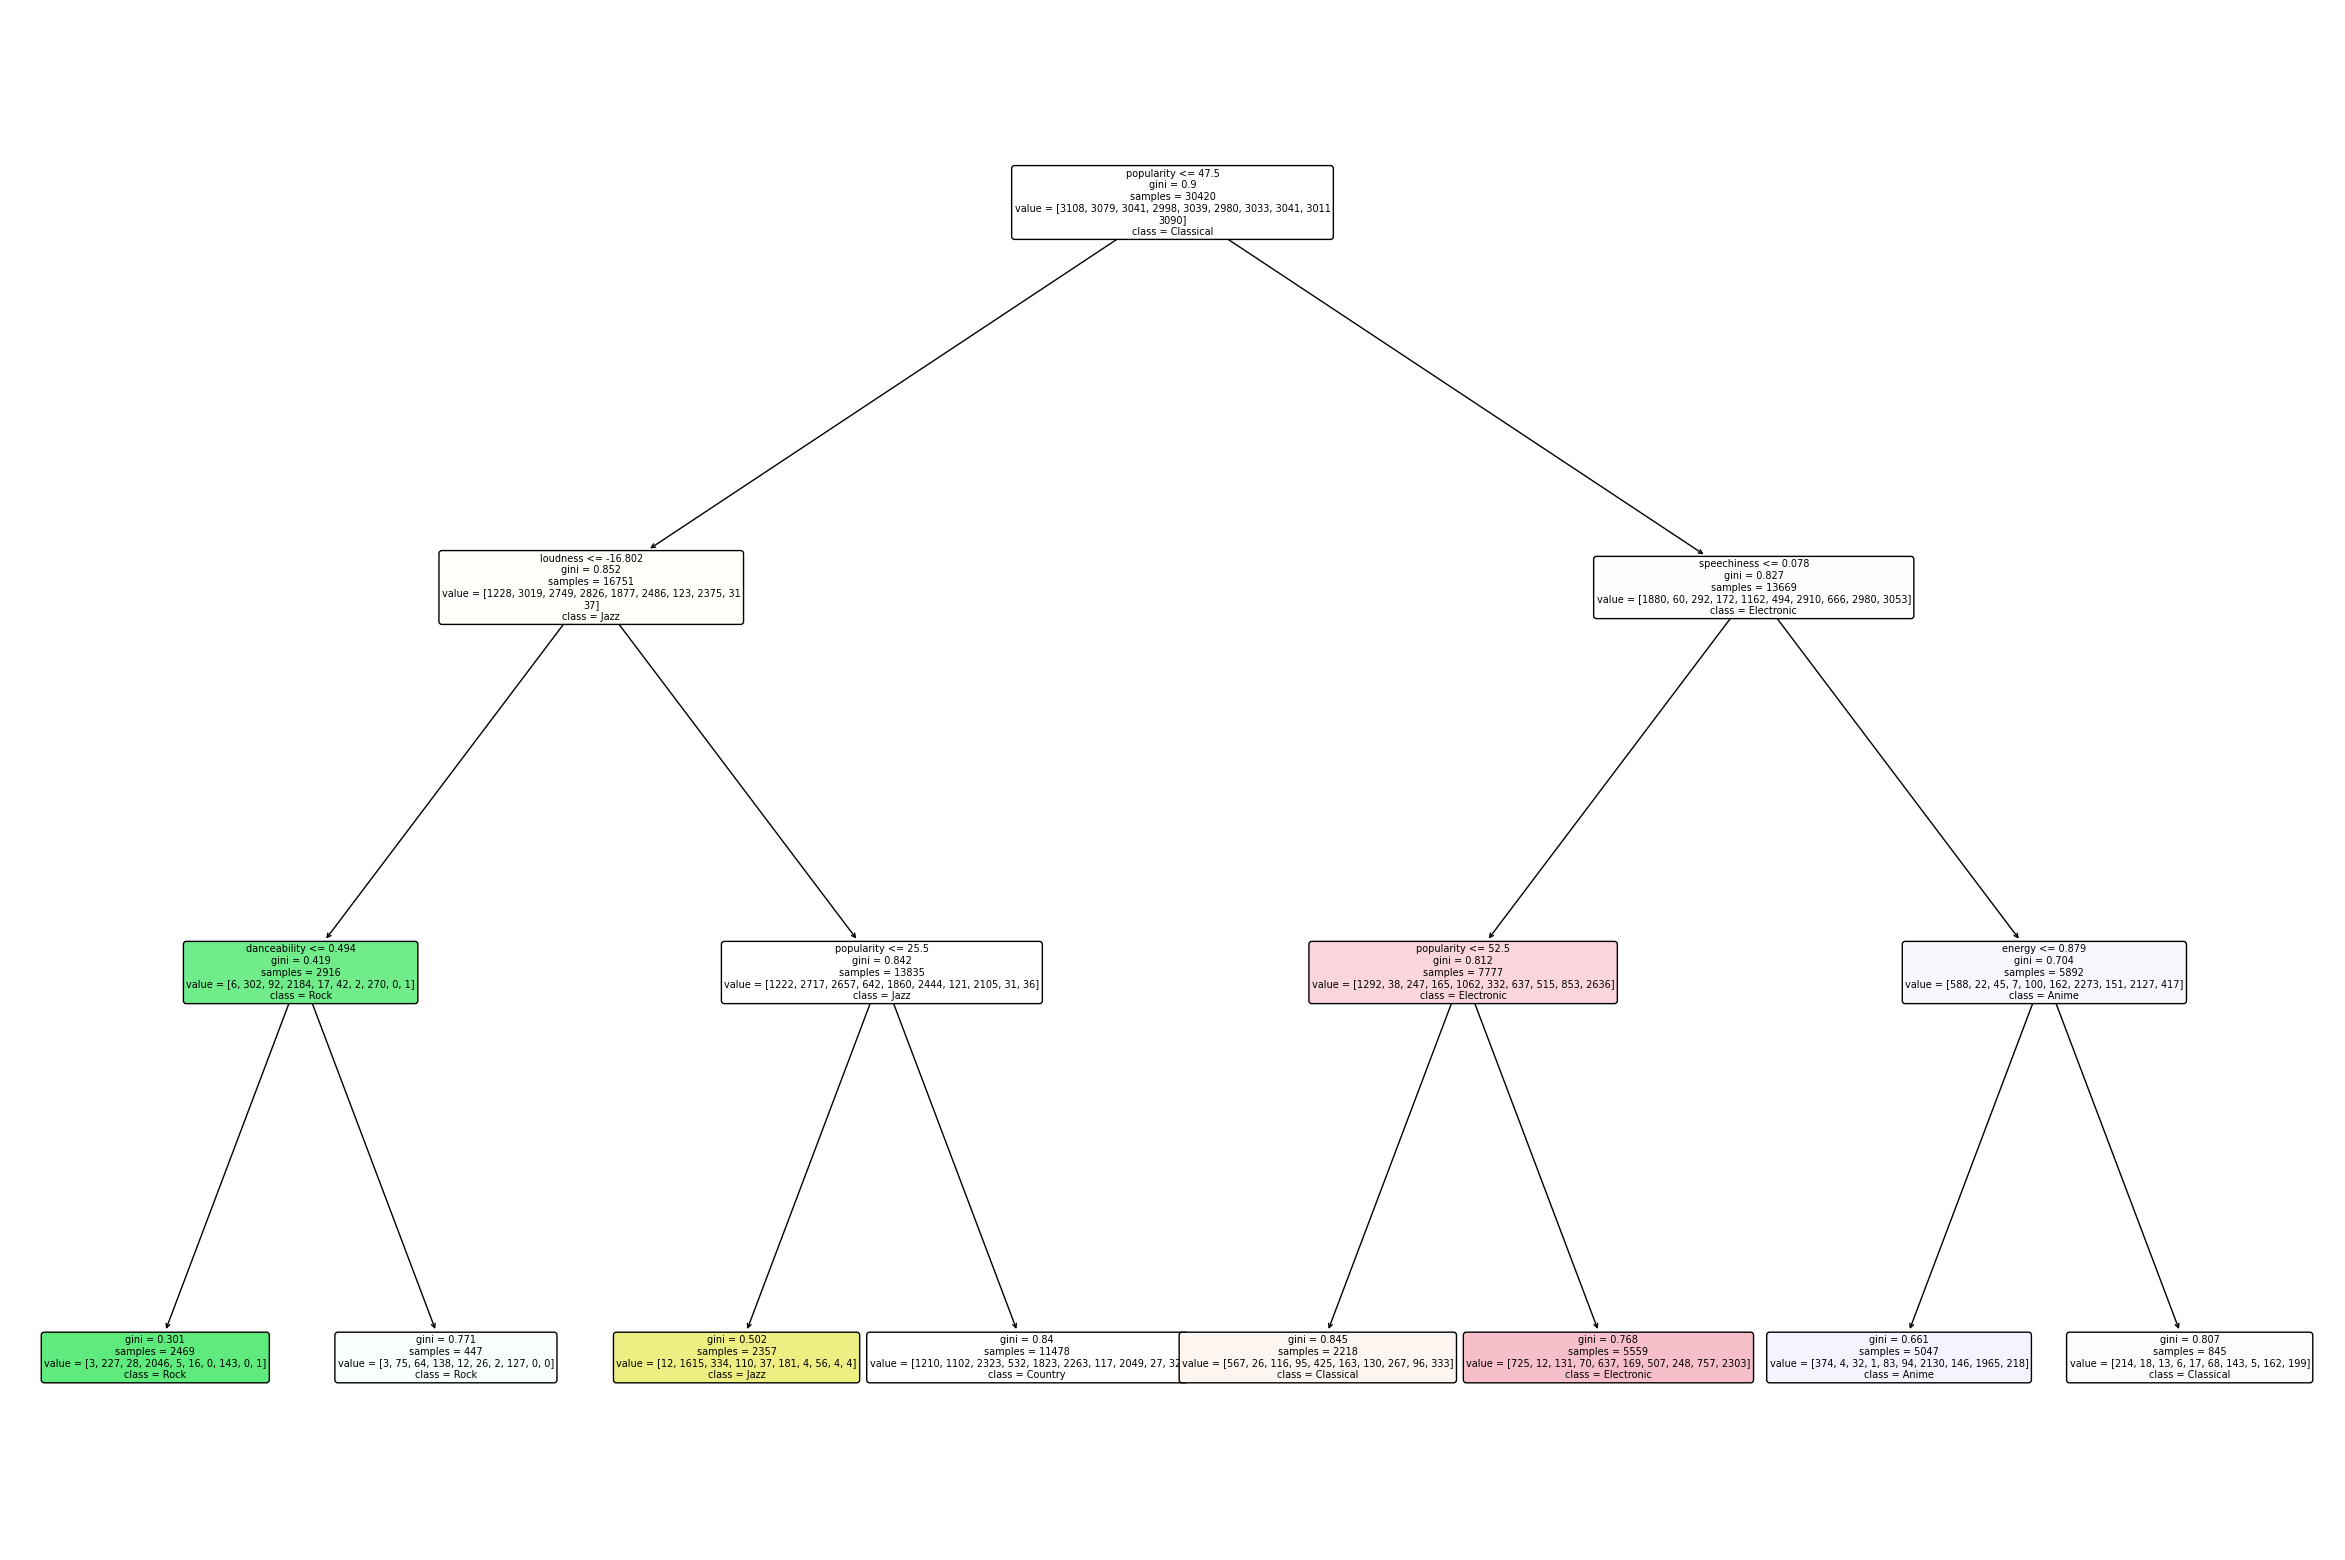

In [45]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,20))
plot_tree(dectree, filled=True, rounded=True, fontsize = 7, 
          feature_names= X_train.columns, 
          class_names= ["Classical","Jazz","Country","Rock","Hip-Hop","Rap","Anime","Alternative","Blues","Electronic"])

## 4d) Confusion Matrix


#### We start by Finding Optimal Depth via K-fold Cross-Validation
We use a range of tree depths to evaluate and to plot the estimated performance +/- 2 standard deviations for each depth using K-fold cross validation. We provide a Python code that can be used in any situation, where you want to tune your decision tree given a predictor tensor X and labels Y. The code includes the training set performance in the plot, while scaling the y-axis to focus on the cross-validation performance.

In [ ]:
# Import essential models and functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')



In [ ]:
#printing out the optimum depth

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The method selects tree depth 9-10 because it achieves the best average accuracy on training data using cross-validation folds with size 5. The lower bound of the confidence interval of the accuracy is high enough to make this value significant. When more nodes are added to the tree, it is clear that the cross-validation accuracy changes towards zero.

#### Now we print the confusion matrix

In [ ]:
# Extract Response and Predictors
y = pd.DataFrame(music['music_genre'])
X = pd.DataFrame(music[predictors])
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 9)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[1])

In the above confusion matrix, 0-9 are the indexes for ["Classical","Jazz","Country","Rock","Hip-Hop","Rap","Anime","Alternative","Blues","Electronic"] respectively

The "Goodness of Fit" refers to the performance of the model, which has been evaluated using the accuracy metric. The accuracy metric measures the proportion of correctly classified instances out of all instances.

In this case, the model was trained on a training dataset and tested on a separate testing dataset. The classification accuracy for the training dataset was found to be around 0.57 - 0.60 depending on the depth of tree, which means that the model correctly classified around 57% - 60% of the instances in the training dataset. The classification accuracy for the testing dataset was found to be around 0.52, which means that the model correctly classified around 52% of the instances in the testing dataset.

This shows that the decision tree may be an acceptable model for predicting song genres

# Second Machine Learning Model: Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

Import the necessary functions for Random Forest model.

In [ ]:
rf = RandomForestClassifier(random_state=50,n_estimators=5,max_depth=4,min_samples_leaf=1)
rf.fit(X_train, y_train.values.ravel())

Do the necessary imports, spliting data into train and test set. Setting up Randomforestclassifier with preset "Random_state", "N-estimators=5" (Number of trees in the forest), "Max_depth=4" (Depth of the tree), "min_samples_leaf =1" (min leaf to determine the split). Fitting the train values into the model.

Random_State: Control the randomness involved in machine learning models
n_estimators: Number of trees to build in the forest.
max_depth: The depth of a tree.
min_samples_leaf : Minimum number of samples required to be at a leaf node.

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", accuracy_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", accuracy_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[1])

Using random forest classifier for the data training, with some pre-defined parameter returns both train and test classification accuracy of 0.47. which means that the model correctly classified 47% of the instances in both training and testing dataset. To further improve our modelling, we went on to implement GridSearch CV to improve our model.


## Implementing GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

#### The code below takes around 12minutes to run, since GridSearchCV fit algorithm is O(n^2) at best, so it is extremely slow. Hyper parameters tuning.

In [ ]:
grid_param = {
    "n_estimators": [10, 15, 20, 25, 30, 35],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(),param_grid=grid_param,scoring="accuracy",cv=5)
grid_search.fit(X_train,y_train.values.ravel())

In the grid_param {} each dictionary in the list will be used to explore. GridSearchCV for hyperparameter tuning in order to locate the best hyperparameters and improve model performance. In the function we predefined a list of values in grid_param for max_depth, n_estimators and minimum sample leaf to be looped through and fit the model on our training set.

In [ ]:
grid_search.best_params_

Retrieving the best parameters for model learning.

In [ ]:
rf3 = RandomForestClassifier(n_estimators = grid_search.best_params_['n_estimators'], max_depth = grid_search.best_params_['max_depth'], min_samples_leaf = grid_search.best_params_['min_samples_leaf'])
rf3.fit(X_train, y_train.values.ravel())

Fitting the best parameters into the classifier.

In [ ]:
y_train_pred3 = rf3.predict(X_train)
y_test_pred3 = rf3.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", accuracy_score(y_train, y_train_pred3))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", accuracy_score(y_test, y_test_pred3))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.heatmap(confusion_matrix(y_train, y_train_pred3),
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[1])

Using the GridSearch CV does returns a better classification accuracy. Random forest classifier generated a better outcome than the multi-variate decision tree after applying both models to our dataset. Therefore, the best method would be to forecast music genres using random forest classifiers. 

Although the outcome might not be the best, 0.66 and 0.56 accuracy are regarded as relatively decent in predicting the music genres based on audio attributes given that it comprises numerous classes and does not have a strong association between each variable and its response "genre". Hence, based on the research and findings we have done, it is possible to predict the genre of a song using its auditory characteristics. However, there is more to be explored.